# History of Election in India

#### The Indian general election of 1951–52, held from 25 October 1951 to 21 February 1952, was the first election to the Lok Sabha since India became independent in August 1947.[1][2][3] It was conducted under the provisions of the Indian Constitution, which was adopted on 26 November 1949. Elections to most of the state legislatures took place simultaneously.

## Political parties

#### A total of 53 parties and 533 independents contested the 489 seats in the election.[12] Two former cabinet colleagues of Nehru established separate political parties to challenge the INC's supremacy. While Syama Prasad Mukherjee went on to found the Jana Sangh in October 1951, first Law Minister B. R. Ambedkar revived the Scheduled Castes Federation (which was later named the Republican Party).

#### Other parties which started coming to the forefront included the Kisan Mazdoor Praja Parishad, whose prime mover was Acharya Kripalani; the Socialist Party, which had Ram Manohar Lohia and Jayaprakash Narayan's leadership to boast of; and the Communist Party of India. However, these smaller parties were unable to make an electoral stand against the Indian National Congress.

![title](image.jpg)

#### The image showing the result of first election result

---------------------

### Bengal contributed 42 seats out of 543 seats for gernal election

![](Bengal_contribution.JPG)

#### Image is showing the 2019 gernal election result in Bengal where 
<ol>
    <li> 22 Seat- AITC</li>
    <li> 18 Seat- BJP</li>
    <li> 2 Seat- INC</li>
    </ol>

### Bengal Election

![](election.jpg)

## Analysis and Data-Prepration 

#### Importing the libraries

In [163]:
import numpy as np 
import pandas as pd
import pandas_profiling
import scipy as sc
import sklearn 
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import math
import nltk
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lb
import catboost as cb
import urllib.request
from pprint import pprint
import pandas_profiling 
import shapash
from html_table_parser import HTMLTableParser
import warnings 

warnings.filterwarnings("ignore")

### Scrapping the data from wikipedia for the population distribution in west bengal

<p> Source of the data is <a href="https://www.wikipedia.org/">Wikipedia</a></p>

In [144]:
class web_scrap:
    def __init__(self,url,number):
        self.url = url
        self.number = number
    def Table_scrap(self):
        request = urllib.request.Request(self.url)
        open_link = urllib.request.urlopen(request)
        xhtml = open_link.read().decode("utf-8")
        table_content = HTMLTableParser()
        table_content.feed(xhtml)
        return table_content.tables[self.number]

In [145]:
Table_of_each_population= web_scrap("https://en.wikipedia.org/wiki/West_Bengal",3).Table_scrap()

In [146]:
Bengal_population_Dataframe = pd.DataFrame(Table_of_each_population[1:len(Table_of_each_population)+1],columns = Table_of_each_population[0])


### Data Description
<ol>
    <li>District : District of Bengal</li>
    <li>Population : Population of that District</li>
    <li>Growth rate : Growth rate of the district</li>
    <li>Sex ratio : Sex ratio of that District</li>
    <li>Literacy: Literacy of that district</li>
    <li>Density per square killometer : Density of population per killometer</li>
    </ol>

In [147]:
Bengal_population_Dataframe

District  Population Growth rate Sex ratio Literacy  \
0   North 24 Parganas  10,009,781       12.04       955    84.06   
1   South 24 Parganas   8,161,961       18.17       956    77.51   
2     Purba Bardhaman   4,835,432           –       945    74.73   
3   Paschim Bardhaman   2,882,031           –       922    78.75   
4         Murshidabad   7,103,807       21.09       958    66.59   
5      West Midnapore   5,913,457       13.86       966    78.00   
6             Hooghly   5,519,145        9.46       961    81.80   
7               Nadia   5,167,600       12.22       947    74.97   
8      East Midnapore   5,095,875       15.36       938    87.02   
9              Howrah   4,850,029       13.50       939    83.31   
10            Kolkata   4,496,694       −1.67       908    86.31   
11             Maldah   3,988,845       21.22       944    61.73   
12         Jalpaiguri   3,872,846       13.87       953    73.25   
13     Alipurduar [a]   1,700,000           –         –        –   
14            Bankura   3,596,292       12.64       954    70.95   
15            Birbhum   3,502,404       16.15       956    70.68   
16     North Dinajpur   3,007,134       23.15       939    59.07   
17            Purulia   2,930,115       15.52       957    64.48   
18        Cooch Behar   2,819,086       13.71       942    74.78   
19         Darjeeling   1,846,823       14.77       970    79.56   
20   Dakshin Dinajpur   1,676,276       11.52       956    72.82   
21      Kalimpong [a]     202,239           –         –        –   
22       Jhargram [a]   1,136,548           –         –        –   

   Density per square Kilometer  
0                          2445  
1                           819  
2                           890  
3                          1800  
4                          1334  
5                           631  
6                          1753  
7                          1316  
8                          1081  
9                          3306  
10                        24306  
11                         1069  
12                          622  
13                          400  
14                          523  
15                          771  
16                          958  
17                          468  
18                          832  
19                          586  
20                          755  
21                          270  
22                          374

In [148]:
## converting all columns into suitable data type
def variable_covertor(dataframe):
    pop = []
    for line in dataframe:
        line = line.replace(",","")
        pop.append((int(line)))
    return pop

In [149]:
def convertor(dataframe):
    lit = []
    for i in dataframe:
        i = i.replace("–","0.00")
        lit.append(float(i))
    return lit
    

In [150]:
Bengal_population_Dataframe["Literacy"] = convertor(Bengal_population_Dataframe["Literacy"])
Bengal_population_Dataframe["Sex ratio"] = convertor(Bengal_population_Dataframe["Sex ratio"])


In [151]:
Bengal_population_Dataframe['Population'] = variable_covertor(Bengal_population_Dataframe['Population'])

In [152]:
Bengal_population_Dataframe.profile_report()

### visualization

In [166]:
class visualization:
    def __init__(self,dataframe,xvalue,yvalue,xlabel,ylabel,title):
        self.dataframe = dataframe
        self.xvalue = xvalue
        self.yvalue  = yvalue
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.title = title
        
    """Creating the different visual charts for understanding"""
    def boxplot_plot(self):
        sns.boxplot(self.dataframe)
        plt.xlabel(self.xlabel);
        plt.ylabel(self.ylabel);
        plt.title(self.title);
        
      
    def countplot_without_percentage_representation(self):
        sns.set_style("darkgrid")
        sns.countplot(x=self.xvalue,data=self.dataframe)
        plt.xlabel(self.xlabel);
        plt.ylabel(self.ylabel);
        plt.title(self.title);
        plt.show()
        
        
        
    def countplot_with_percentage_representation(self):
        sns.set_style("darkgrid")
        ax = sns.countplot(x=self.xvalue,data=self.dataframe)
        total = len(self.dataframe)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width()
            y = p.get_height()
            ax.annotate(percentage, (x, y),ha='right')
        plt.xlabel(self.xlabel);
        plt.ylabel(self.ylabel);
        plt.title(self.title);
        plt.show()
    
    
    
        
    """Scatter plot to see the multivariate outlier"""
    def scatterplot(self):
        sns.scatterplot(x=self.xvalue,y=self.yvalue,data=self.dataframe)
        plt.xlabel(self.xlabel);
        plt.title(self.title);
        plt.show()
        
        
    def heatmap(self):
        correlation_data = self.dataframe.corr()
        sns.heatmap(correlation_data,annot=True)
        plt.xlabel(self.xlabel);
        plt.title(self.title);
        plt.show()
        
    def violinplot(self):
        sns.violinplot(data=self.dataframe,x=self.xvalue,y=self.yvalue,split=True,inner="quart",linewidth=1,palette={'Yes':"b","No":".85"})
        sns.despine(left=True)
        plt.xlabel(self.xlabel);
        plt.title(self.title);
        plt.show()
        
    """Specific pie chart for weekly engagement of mundra port"""   
    def piechart(self):
        fig, ax = plt.subplots()
        District = self.dataframe[self.xvalue]
        df_pie = pd.DataFrame(District)
        df_pie["count"] = self.dataframe[self.yvalue]
        
        labels = [i for i in df_pie[self.xvalue].unique()]
        
        points = [j for j in df_pie["count"]]
    
        add_points = df_pie["count"].sum()
        add_points = int(add_points)
        per = []
        for j in  points:
            per.append(j/add_points)
        percentages = [i for i in df_pie["count"].unique()]
        explode=per
        ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', shadow=False, startangle=0,pctdistance=1.2,labeldistance=1.5);
        ax.axis('equal')
        ax.set_title(self.title)
        ax.legend(frameon=False, bbox_to_anchor=(1.8,1.0));
        
        
    def bar_chart(self):
        objects = tuple(self.xvalue)
        y_pos = np.arange(len(objects))
        performance = list(self.yvalue)
        plt.bar(y_pos, performance, align='center', alpha=0.5)
        plt.xticks(y_pos, objects,rotation=60)
        plt.ylabel(self.ylabel)
        plt.title(self.title)
        plt.show()

        
    

### Westbengal population distribution

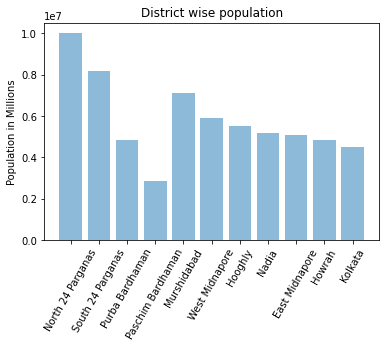

In [167]:
visualization(Bengal_population_Dataframe,Bengal_population_Dataframe.iloc[:11,0],Bengal_population_Dataframe.iloc[:11,1],"","Population in Millions","District wise population").bar_chart()

### West bengal 2016 result analysis

In [155]:
Bengal_2016_result_analysis = web_scrap("https://en.wikipedia.org/wiki/2016_West_Bengal_Legislative_Assembly_election",11).Table_scrap()

In [156]:
Bengal_2016_result_analysis_df = pd.DataFrame(Bengal_2016_result_analysis[1:len(Bengal_2016_result_analysis)+1],columns = Bengal_2016_result_analysis[0])

In [157]:
Bengal_2016_result_analysis_df

District Total AITC  LF UPA NDA Others
0         Cooch Behar     9    8   1   0   0      0
1          Jalpaiguri     7    6   0   1   0      0
2          Alipurduar     5    4   0   0   1      0
3          Darjeeling     6    0   1   2   3      0
4      North Dinajpur     9    4   2   3   0      0
5      South Dinajpur     6    2   3   1   0      0
6               Malda    12    1   1   8   1      1
7         Murshidabad    22    4   4  14   0      0
8               Nadia    17   13   1   3   0      0
9   North 24 Parganas    33   27   3   3   0      0
10  South 24 Parganas    31   29   2   0   0      0
11            Kolkata    11   11   0   0   0      0
12             Howrah    16   15   0   1   0      0
13            Hooghly    18   16   1   1   0      0
14     East Midnapore    16   13   3   0   0      0
15     West Midnapore    19   17   0   1   1      0
16            Purulia     9    7   0   2   0      0
17            Bankura    12    7   3   2   0      0
18            Burdwan    25   19   5   1   0      0
19            Birbhum    11    9   1   1   0      0
20              Total   294  211  32  44   6      1

In [158]:
Bengal_2016_result_analysis_df["Total"] = convertor(Bengal_2016_result_analysis_df["Total"])
Bengal_2016_result_analysis_df["AITC"] = convertor(Bengal_2016_result_analysis_df["AITC"])
Bengal_2016_result_analysis_df["LF"] = convertor(Bengal_2016_result_analysis_df["LF"])
Bengal_2016_result_analysis_df["UPA"] = convertor(Bengal_2016_result_analysis_df["UPA"])
Bengal_2016_result_analysis_df["NDA"] = convertor(Bengal_2016_result_analysis_df["NDA"])
Bengal_2016_result_analysis_df["Others"] = convertor(Bengal_2016_result_analysis_df["Others"])


In [159]:
Bengal_2016_result_analysis_df

District  Total   AITC    LF   UPA  NDA  Others
0         Cooch Behar    9.0    8.0   1.0   0.0  0.0     0.0
1          Jalpaiguri    7.0    6.0   0.0   1.0  0.0     0.0
2          Alipurduar    5.0    4.0   0.0   0.0  1.0     0.0
3          Darjeeling    6.0    0.0   1.0   2.0  3.0     0.0
4      North Dinajpur    9.0    4.0   2.0   3.0  0.0     0.0
5      South Dinajpur    6.0    2.0   3.0   1.0  0.0     0.0
6               Malda   12.0    1.0   1.0   8.0  1.0     1.0
7         Murshidabad   22.0    4.0   4.0  14.0  0.0     0.0
8               Nadia   17.0   13.0   1.0   3.0  0.0     0.0
9   North 24 Parganas   33.0   27.0   3.0   3.0  0.0     0.0
10  South 24 Parganas   31.0   29.0   2.0   0.0  0.0     0.0
11            Kolkata   11.0   11.0   0.0   0.0  0.0     0.0
12             Howrah   16.0   15.0   0.0   1.0  0.0     0.0
13            Hooghly   18.0   16.0   1.0   1.0  0.0     0.0
14     East Midnapore   16.0   13.0   3.0   0.0  0.0     0.0
15     West Midnapore   19.0   17.0   0.0   1.0  1.0     0.0
16            Purulia    9.0    7.0   0.0   2.0  0.0     0.0
17            Bankura   12.0    7.0   3.0   2.0  0.0     0.0
18            Burdwan   25.0   19.0   5.0   1.0  0.0     0.0
19            Birbhum   11.0    9.0   1.0   1.0  0.0     0.0
20              Total  294.0  211.0  32.0  44.0  6.0     1.0

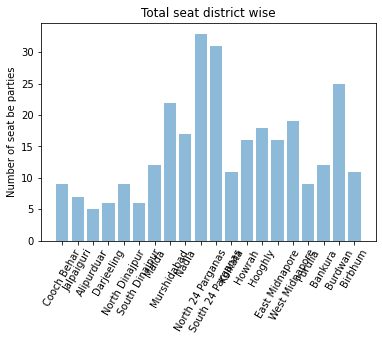

In [170]:
visualization(Bengal_2016_result_analysis_df,Bengal_2016_result_analysis_df.iloc[:20,0],Bengal_2016_result_analysis_df.iloc[:20,1],"","Number of seat be parties","Total seat district wise").bar_chart()

## Performance by AITC in 2016 (All India Trinamool Congress)

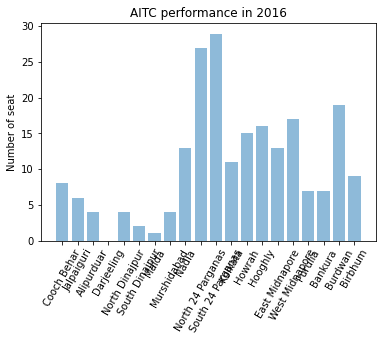

In [172]:
visualization(Bengal_2016_result_analysis_df,Bengal_2016_result_analysis_df.iloc[:20,0],Bengal_2016_result_analysis_df.iloc[:20,2],"","Number of seat","AITC performance in 2016").bar_chart()

## Performance by Left in 2016 

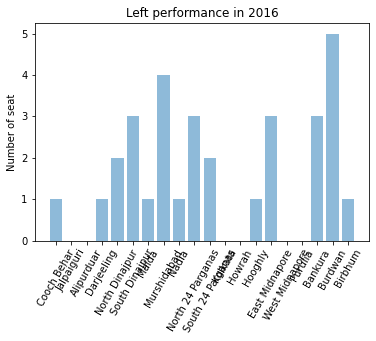

In [173]:
visualization(Bengal_2016_result_analysis_df,Bengal_2016_result_analysis_df.iloc[:20,0],Bengal_2016_result_analysis_df.iloc[:20,3],"","Number of seat","Left performance in 2016").bar_chart()

## Performance by UPA in 2016 

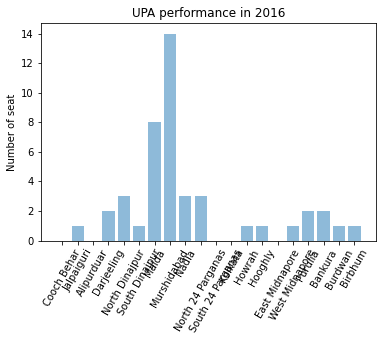

In [176]:
visualization(Bengal_2016_result_analysis_df,Bengal_2016_result_analysis_df.iloc[:20,0],Bengal_2016_result_analysis_df.iloc[:20,4],"","Number of seat","UPA performance in 2016").bar_chart()

## Performance by NDA in 2016 

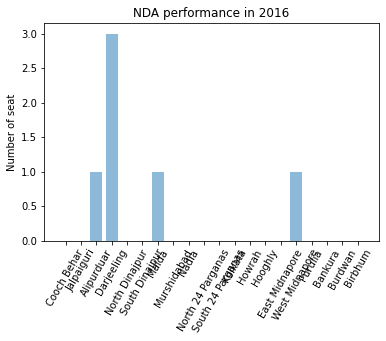

In [177]:
visualization(Bengal_2016_result_analysis_df,Bengal_2016_result_analysis_df.iloc[:20,0],Bengal_2016_result_analysis_df.iloc[:20,5],"","Number of seat","NDA performance in 2016").bar_chart()

### Trinmool congress did well in 2016 election

--------------

#### Deep down analysis in 2016 election

In [186]:
Bengal_detail_result_analysis = pd.read_excel("Detailed Results.xlsx",header=2)

In [187]:
Bengal_detail_result_analysis

Constituency No. Constituency Name             Candidate Name  \
0                    1         Mekliganj  ARGHYA ROY PRADHAN (BILU)   
1                    1         Mekliganj    PARESH CHANDRA ADHIKARY   
2                    1         Mekliganj               DADHIRAM RAY   
3                    1         Mekliganj                JYOTISH ROY   
4                    1         Mekliganj          None of the Above   
...                ...               ...                        ...   
2250               294           Murarai          HAYATUNNINSH BIBI   
2251               294           Murarai          None of the Above   
2252               294           Murarai                 BELAL SEKH   
2253               294           Murarai              MANGAL HEMRAM   
2254               294           Murarai               SAMSHUL MIYA   

     Candidate Sex  Candidate Age Candidate Category  Party Name  \
0                M           44.0                 SC        AITC   
1                M           63.0                 SC        AIFB   
2                M           32.0                 SC         BJP   
3                M           66.0                 SC         BSP   
4              NaN            NaN                NaN        NOTA   
...            ...            ...                ...         ...   
2250             F           26.0                GEN         BJP   
2251           NaN            NaN                NaN        NOTA   
2252             M           28.0                GEN         BSP   
2253             M           65.0                 ST        SUCI   
2254             M           48.0                GEN         RLD   

       VALID VOTES POLLED in General   VALID VOTES POLLED in Postal  \
0                              74608                            215   
1                              67821                            365   
2                              23313                             42   
3                               5650                              0   
4                               2331                              2   
...                              ...                            ...   
2250                            5341                              4   
2251                            1687                              2   
2252                            1376                              0   
2253                             910                              7   
2254                             866                              0   

       Total Valid Votes  Total Electors  Total Votes  
0                  74823          202689       180960  
1                  68186          202689       180960  
2                  23355          202689       180960  
3                   5650          202689       180960  
4                   2333          202689       180960  
...                  ...             ...          ...  
2250                5345          234055       199235  
2251                1689          234055       199235  
2252                1376          234055       199235  
2253                 917          234055       199235  
2254                 866          234055       199235  

[2255 rows x 12 columns]

### Candidates categories

In [190]:
Bengal_detail_result_analysis["Candidate Category"].value_counts()

GEN    1196
SC      614
ST      151
Name: Candidate Category, dtype: int64

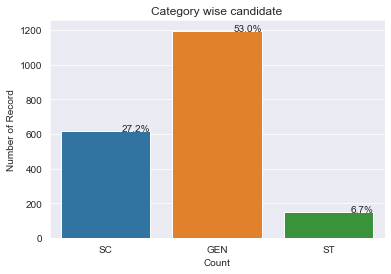

In [189]:
visualization(Bengal_detail_result_analysis,"Candidate Category"," ","Count","Number of Record","Category wise candidate").countplot_with_percentage_representation()


### Total 53% of gernal category candidate was there in 2016 election

----------------------

### Gender wise analysis 

In [191]:
Bengal_detail_result_analysis["Candidate Sex"].value_counts()

M    1761
F     200
Name: Candidate Sex, dtype: int64

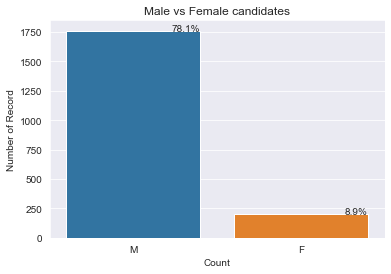

In [192]:
visualization(Bengal_detail_result_analysis,"Candidate Sex"," ","Count","Number of Record","Male vs Female candidates").countplot_with_percentage_representation()


### 78.1% candidates are Male and 8.9% of the candidate are female and remaining 13% records are missing but we can clearly see male candidates are in huge majority 

In [194]:
Bengal_detail_result_analysis.columns

Index(['Constituency No.', 'Constituency Name', 'Candidate Name',
       'Candidate Sex', 'Candidate Age', 'Candidate Category', ' Party Name',
       ' VALID VOTES POLLED in General', ' VALID VOTES POLLED in Postal',
       ' Total Valid Votes', 'Total Electors', 'Total Votes'],
      dtype='object')

#### West bengal has total 294 constituency and their valid vote  conut for all the candidate

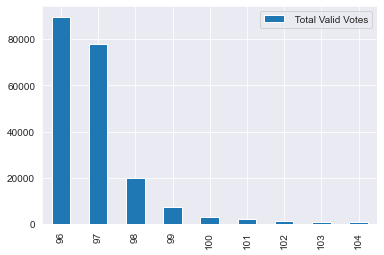

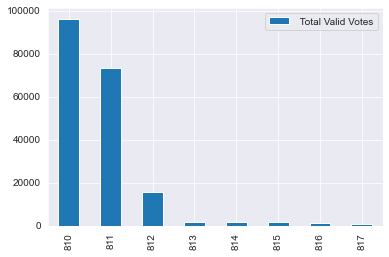

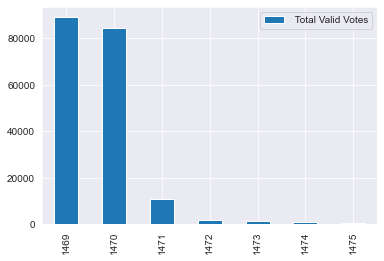

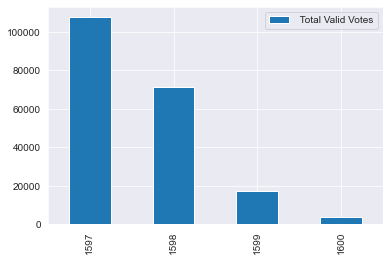

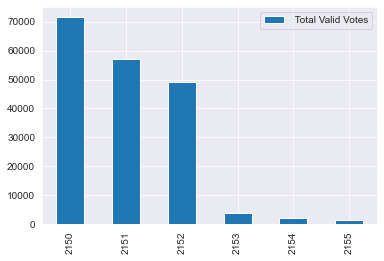

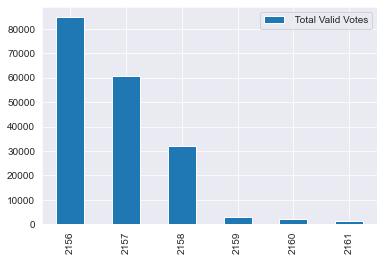

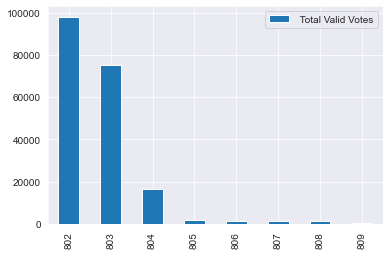

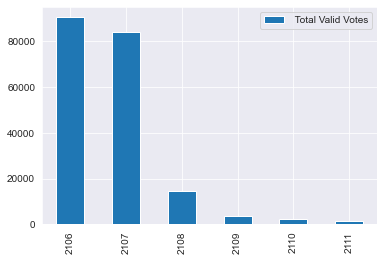

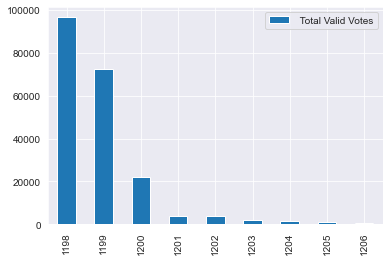

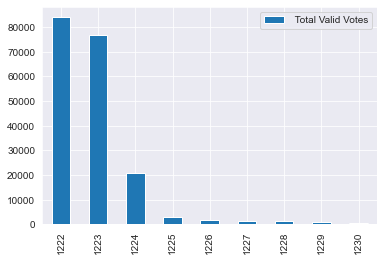

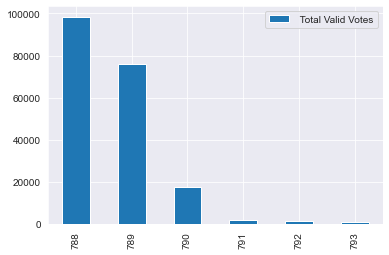

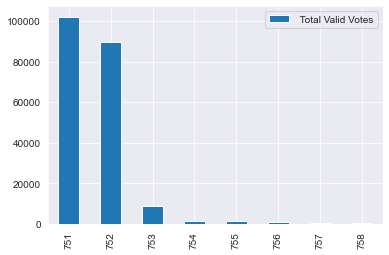

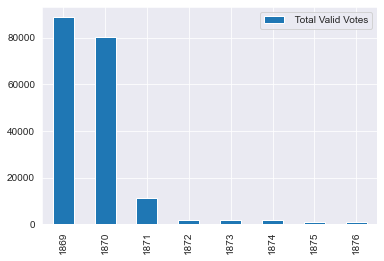

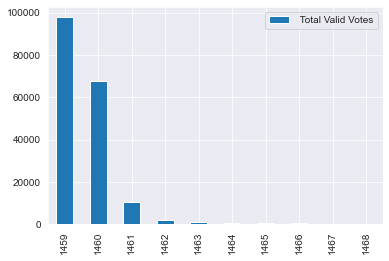

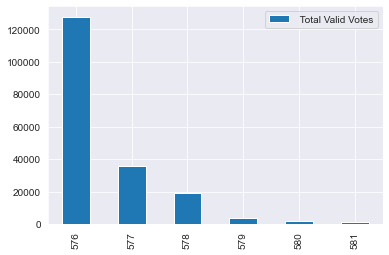

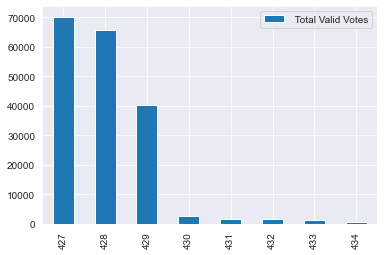

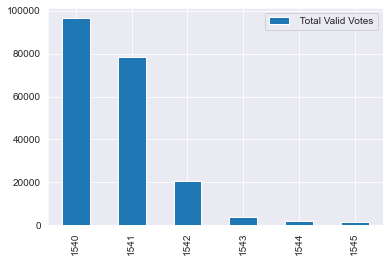

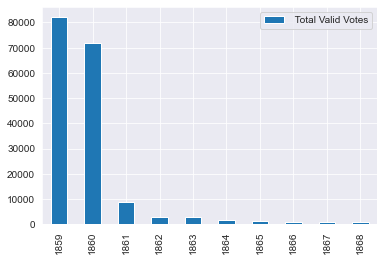

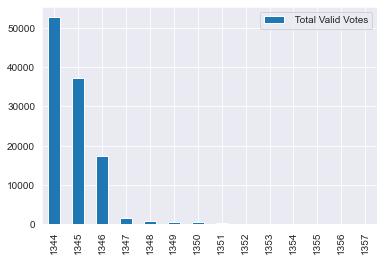

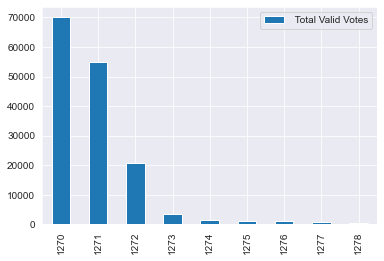

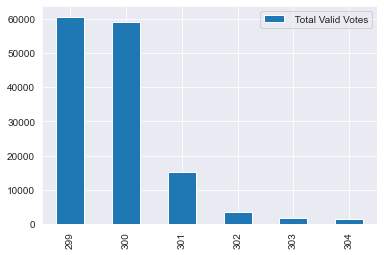

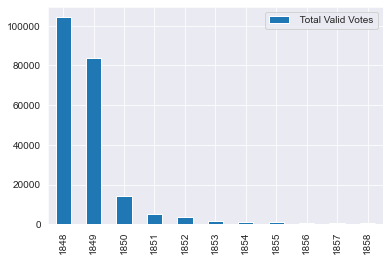

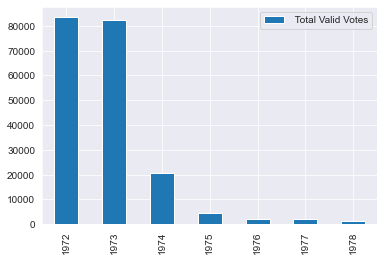

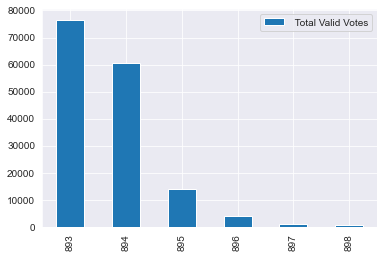

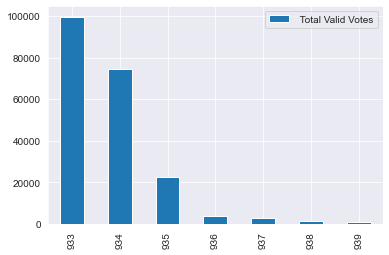

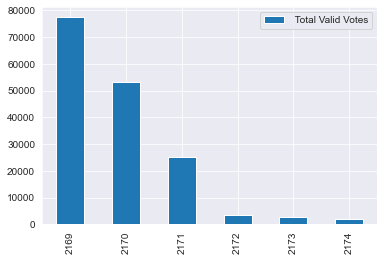

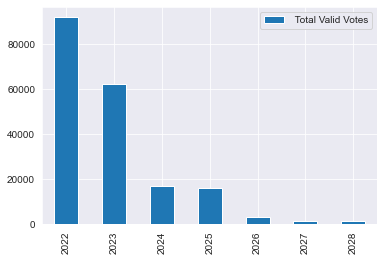

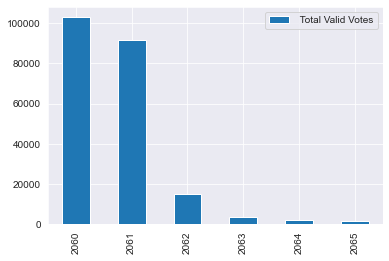

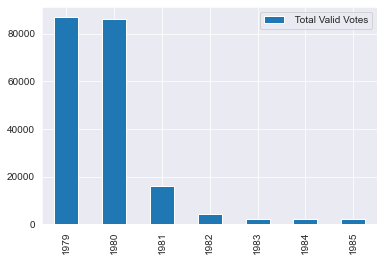

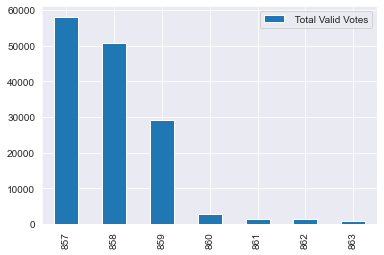

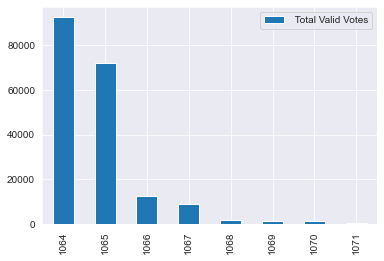

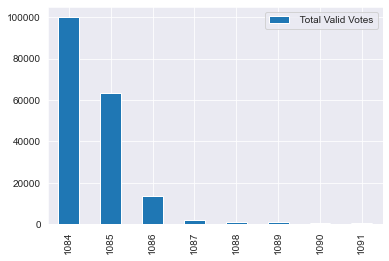

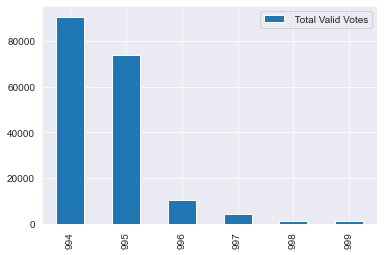

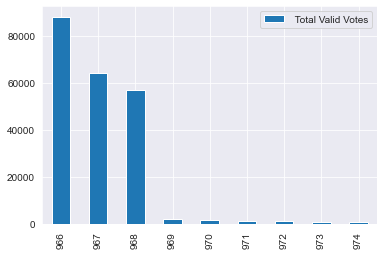

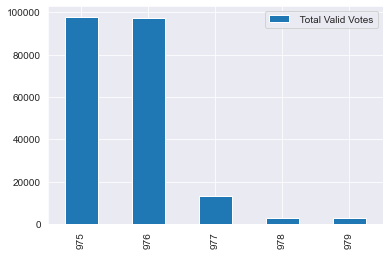

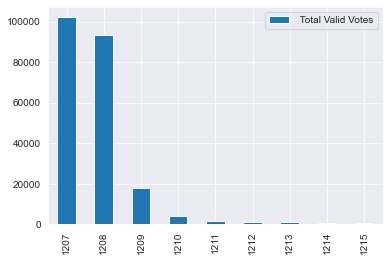

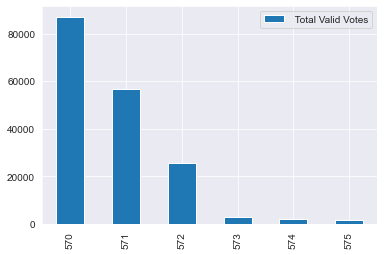

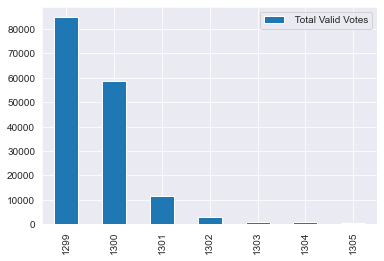

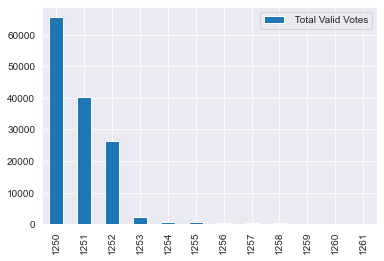

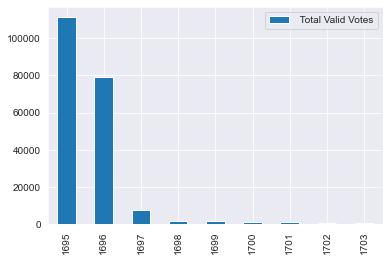

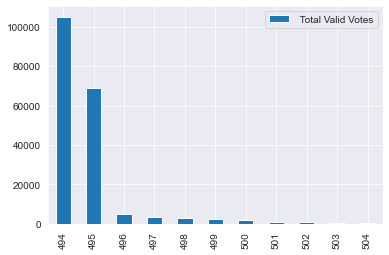

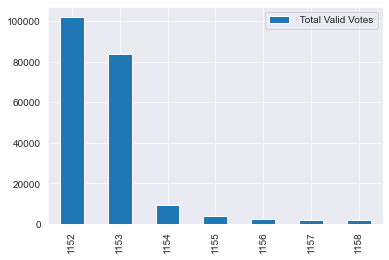

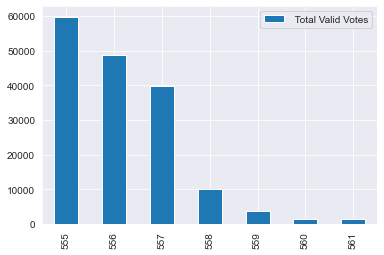

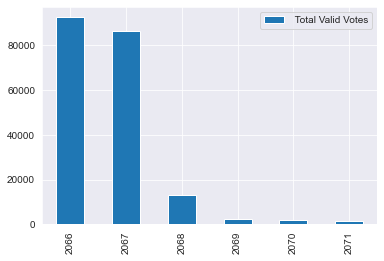

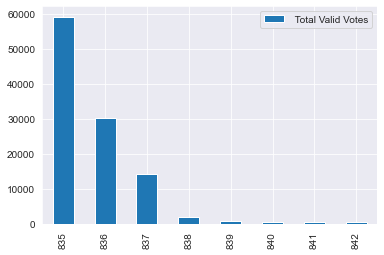

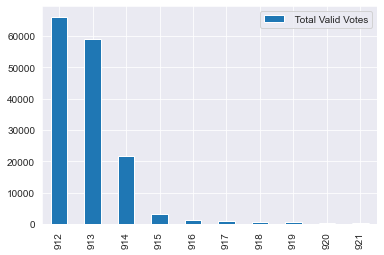

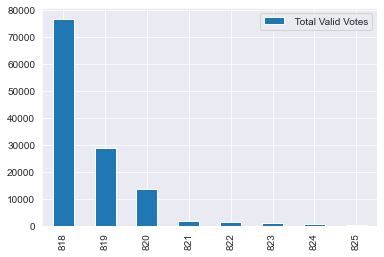

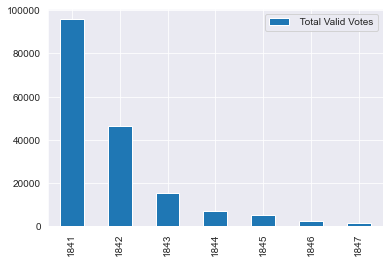

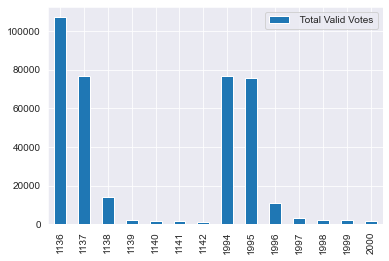

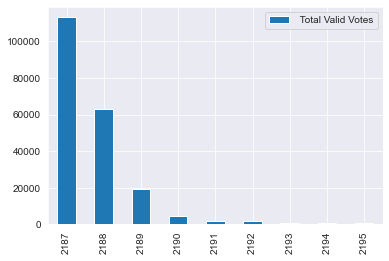

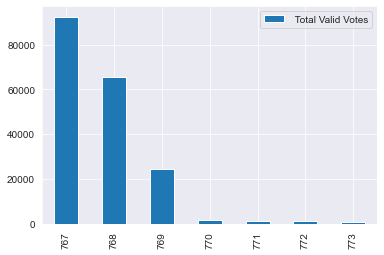

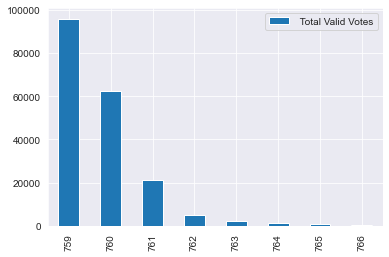

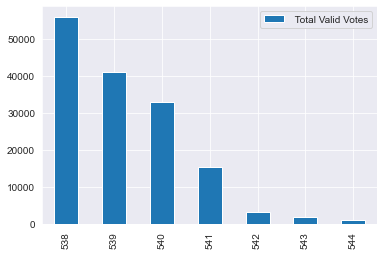

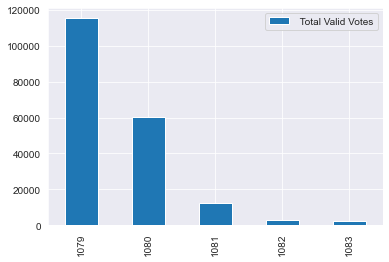

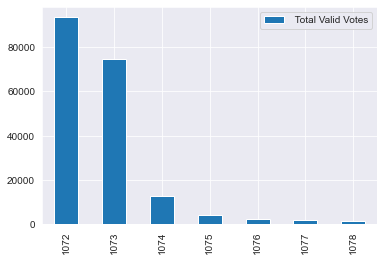

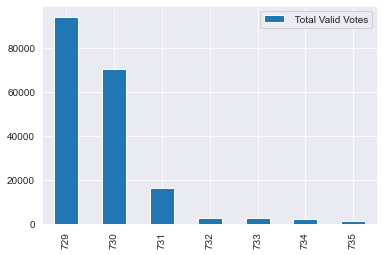

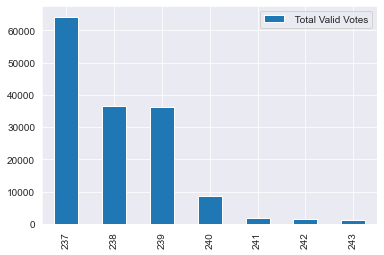

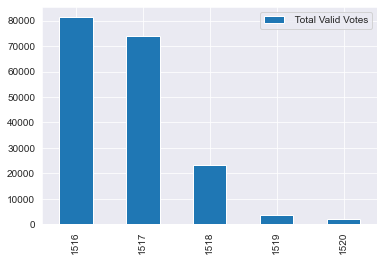

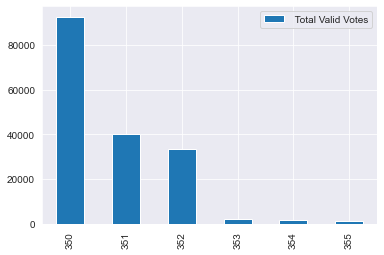

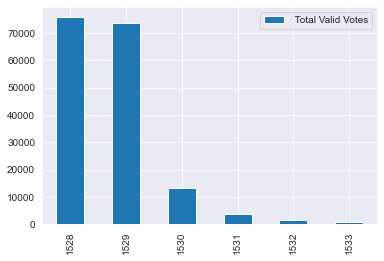

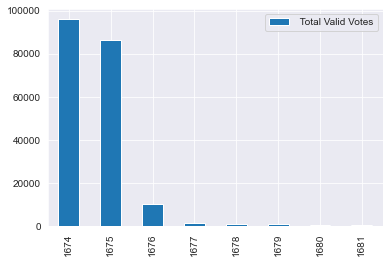

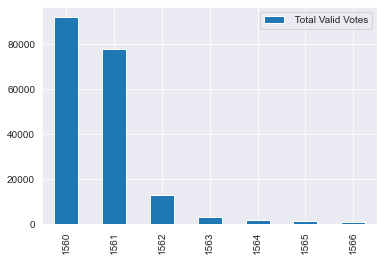

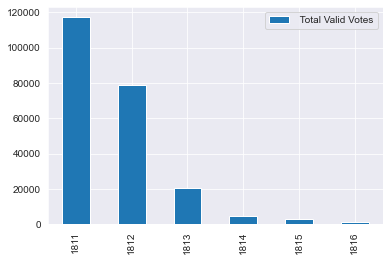

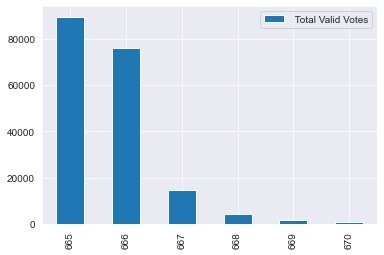

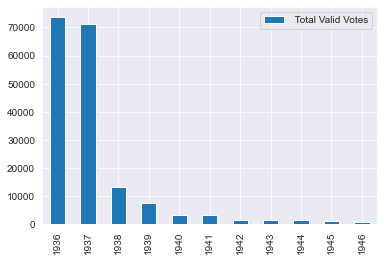

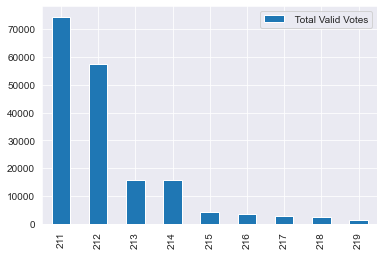

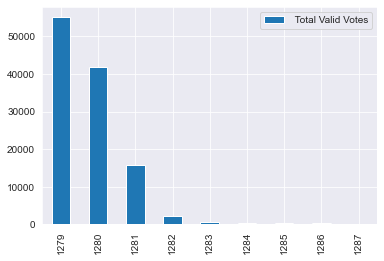

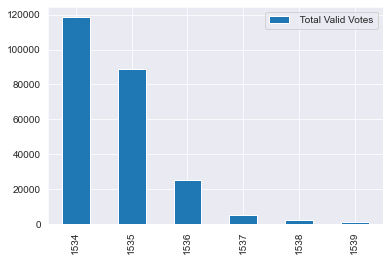

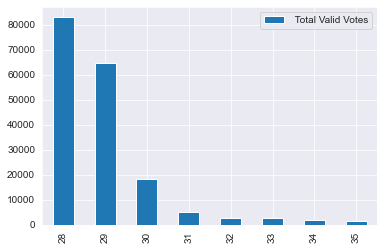

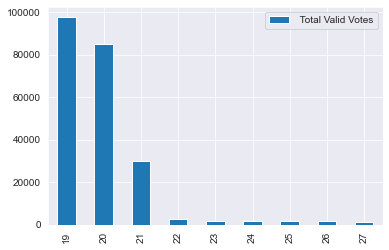

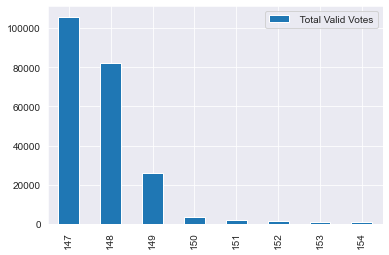

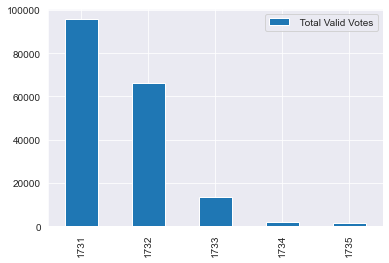

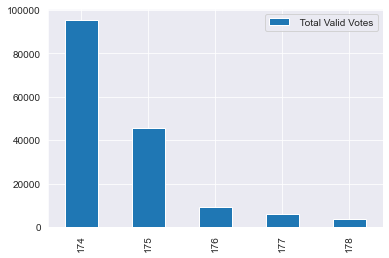

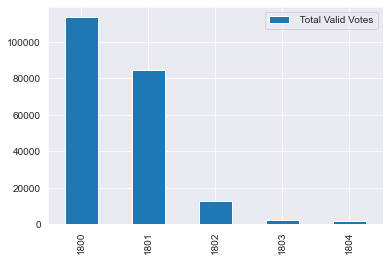

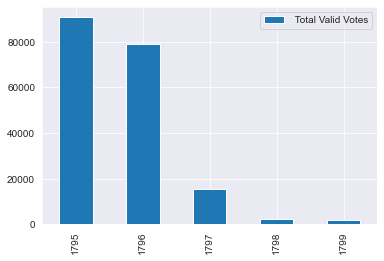

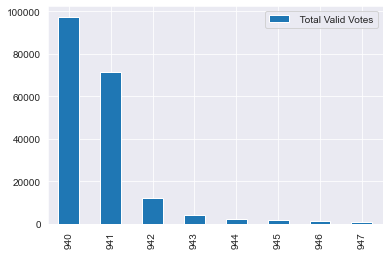

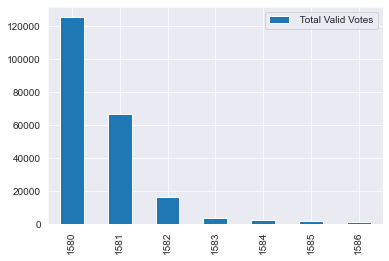

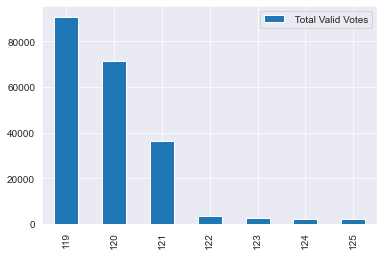

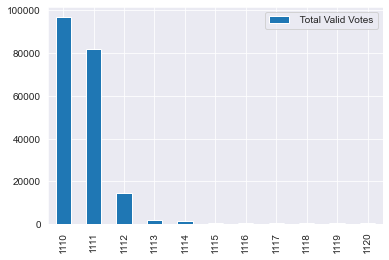

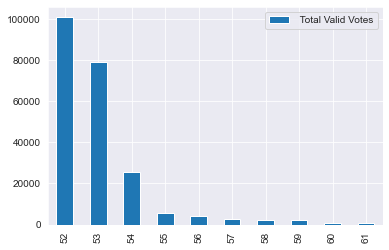

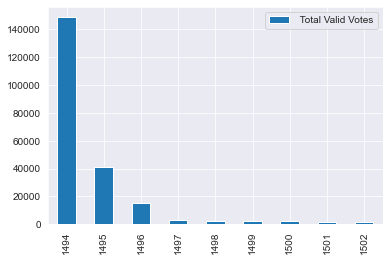

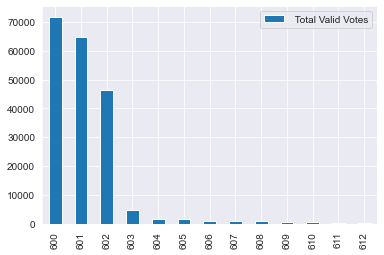

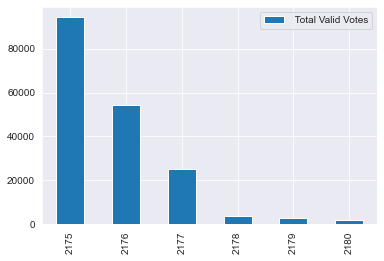

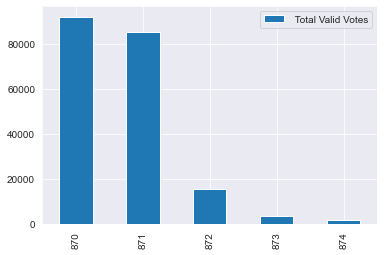

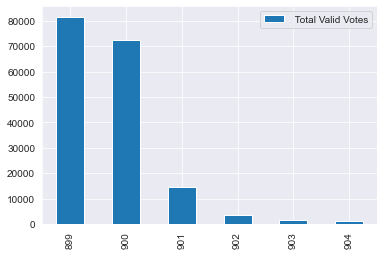

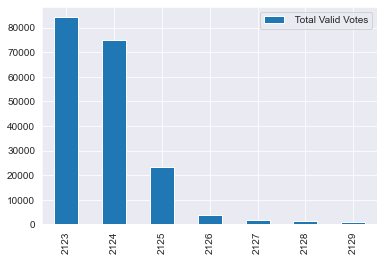

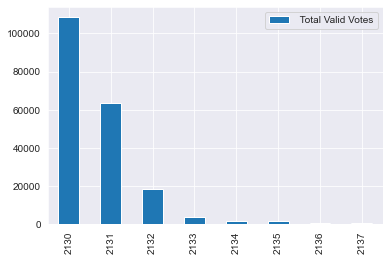

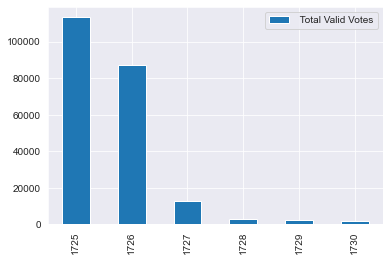

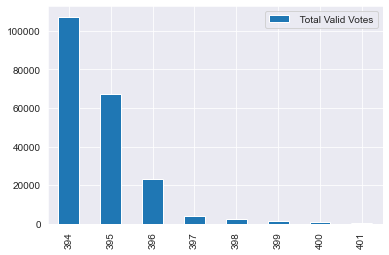

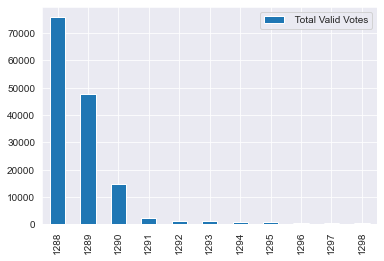

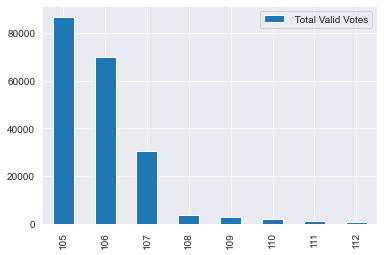

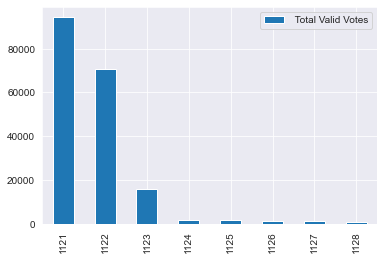

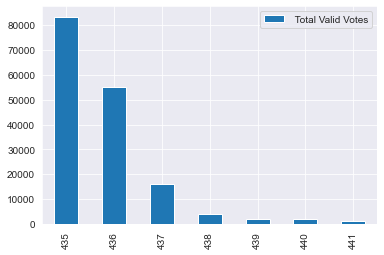

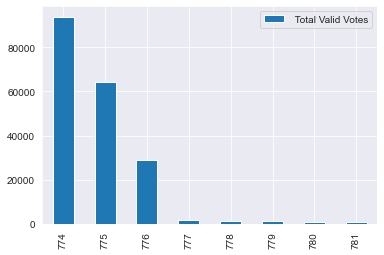

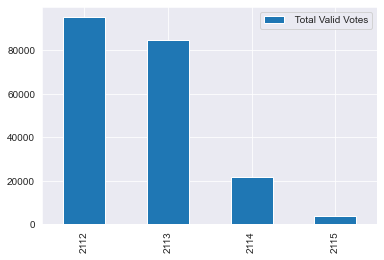

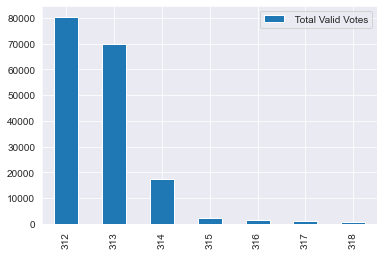

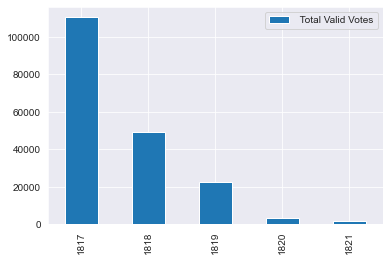

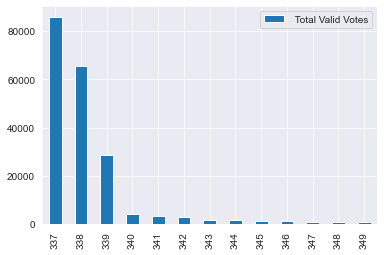

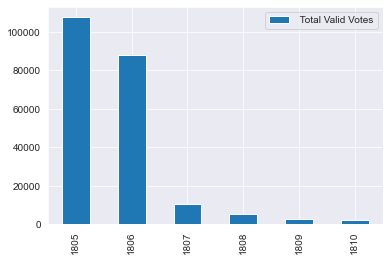

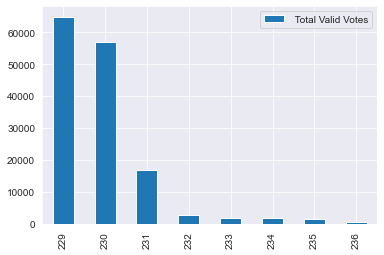

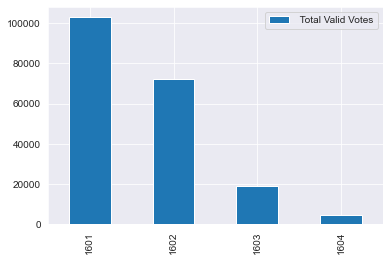

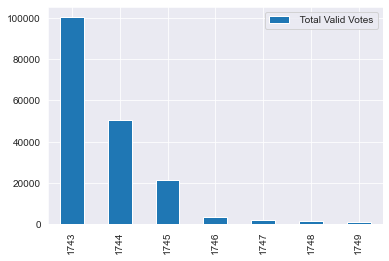

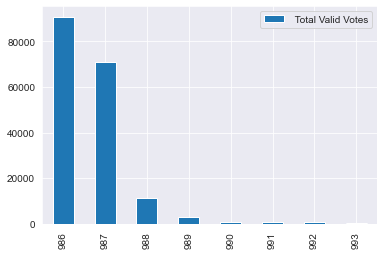

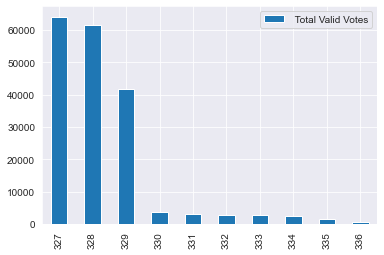

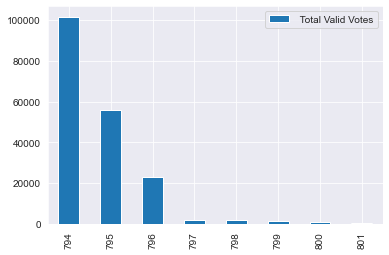

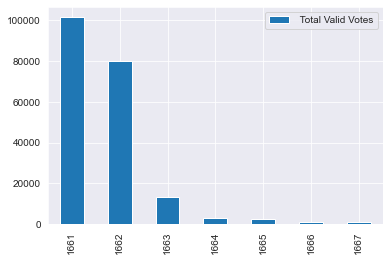

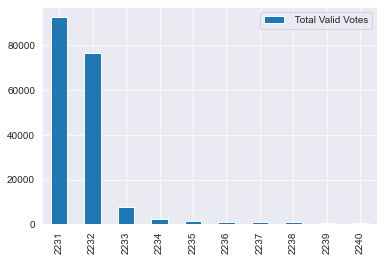

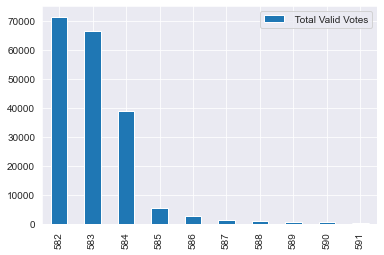

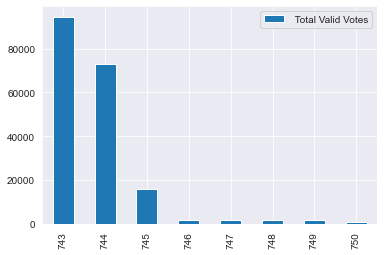

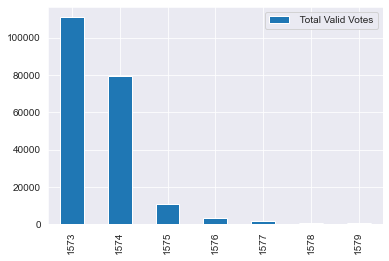

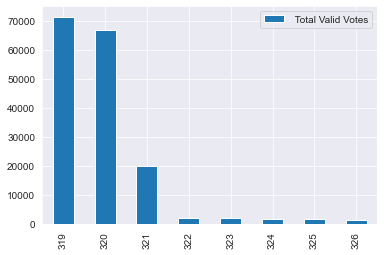

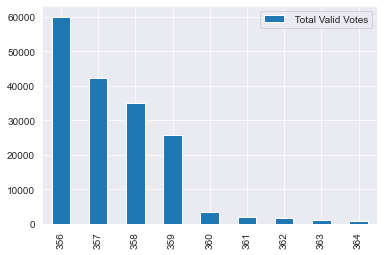

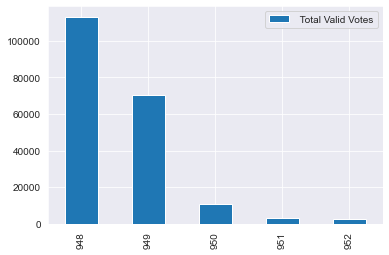

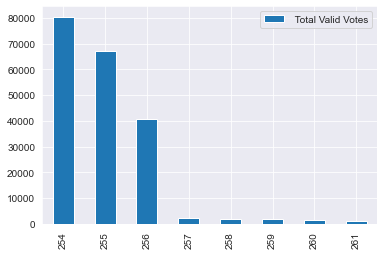

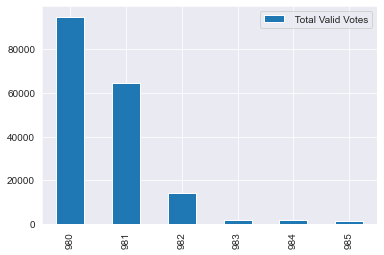

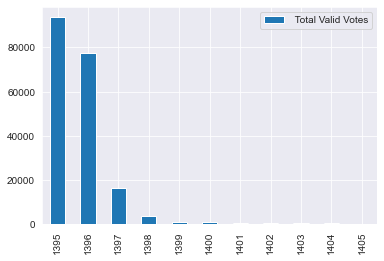

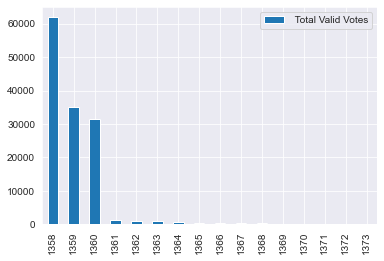

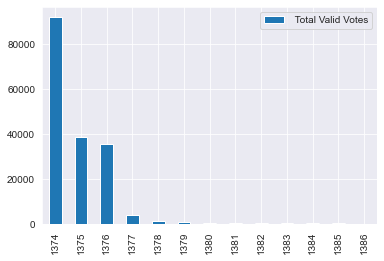

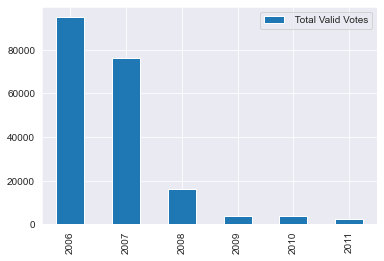

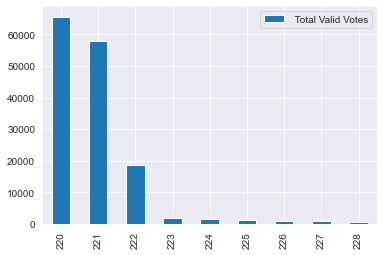

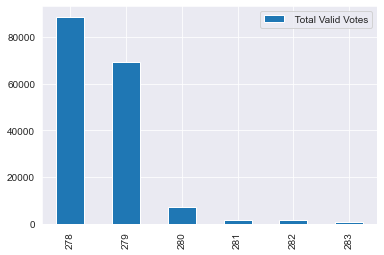

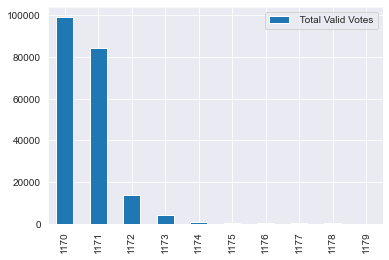

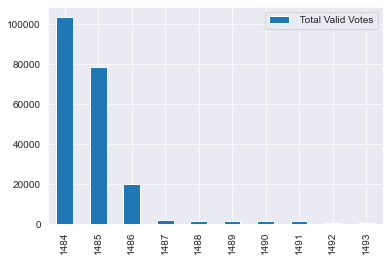

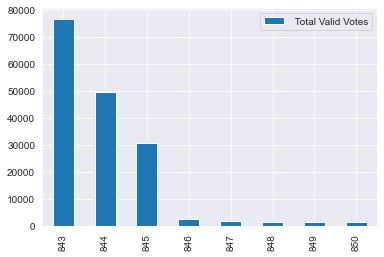

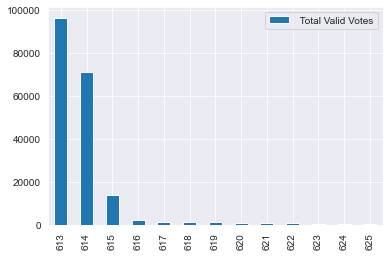

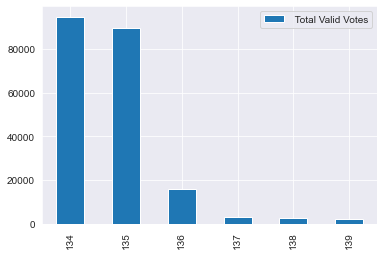

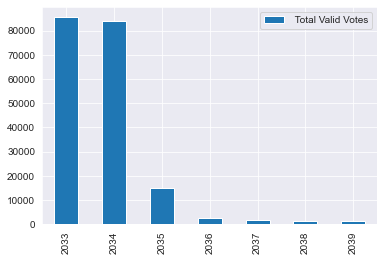

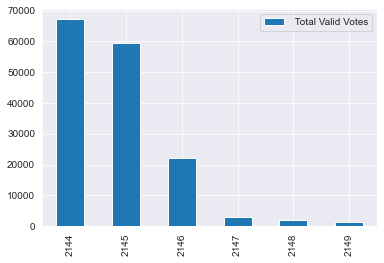

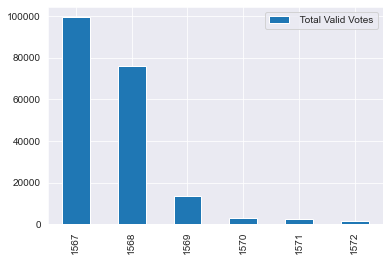

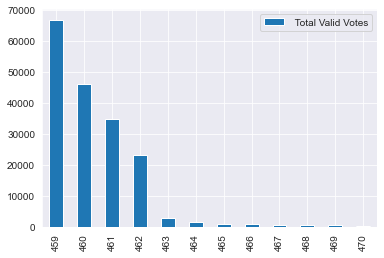

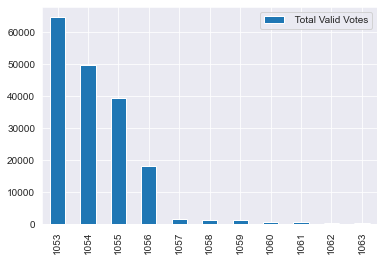

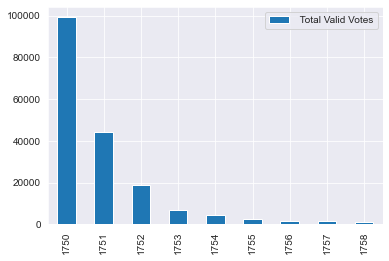

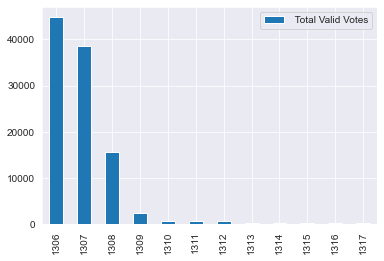

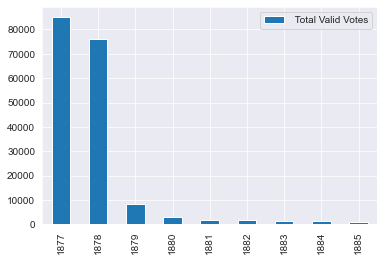

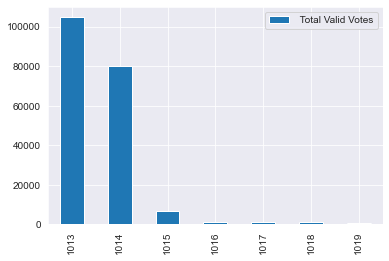

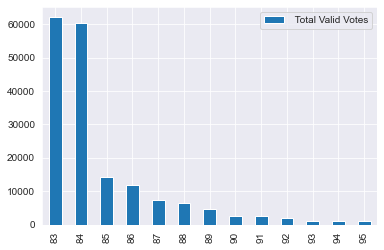

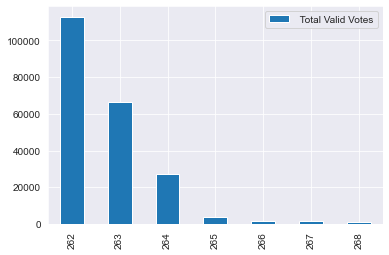

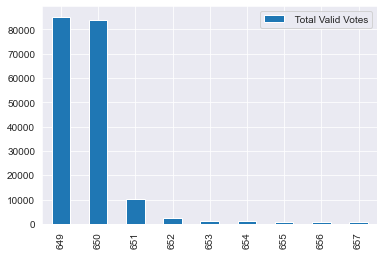

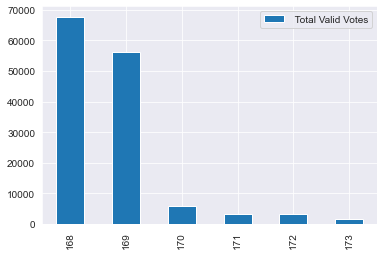

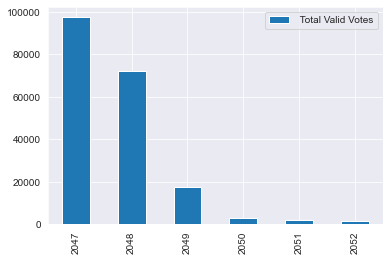

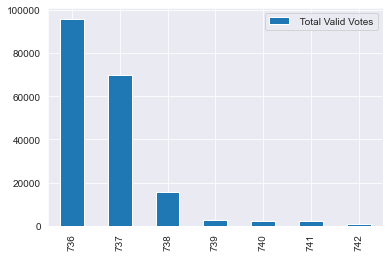

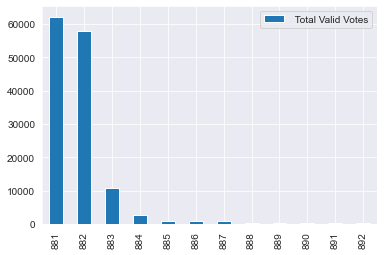

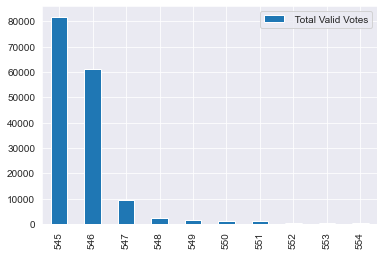

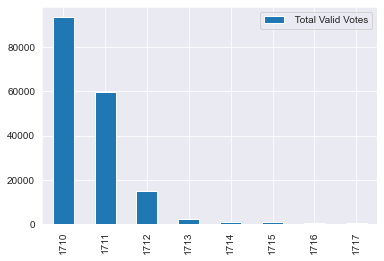

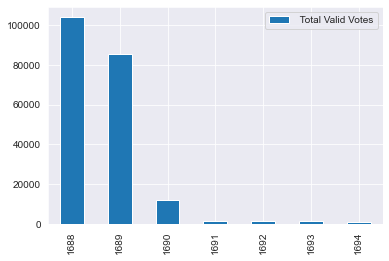

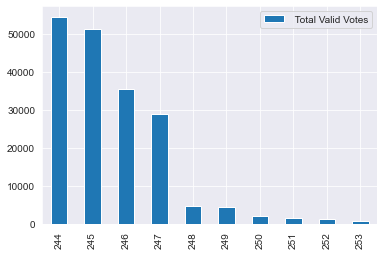

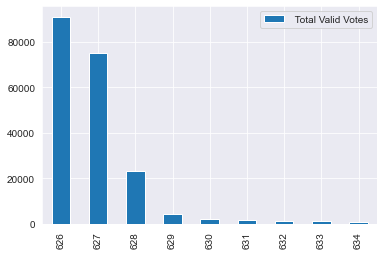

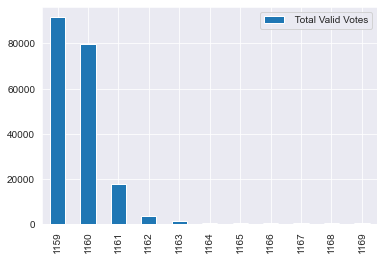

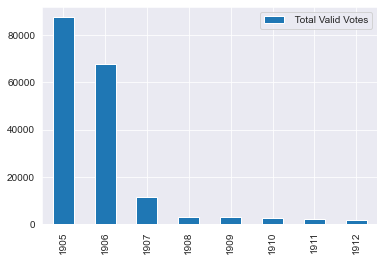

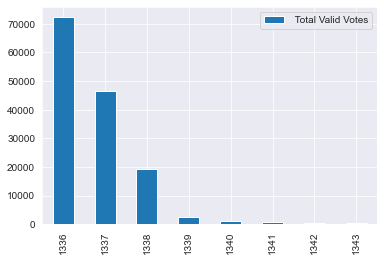

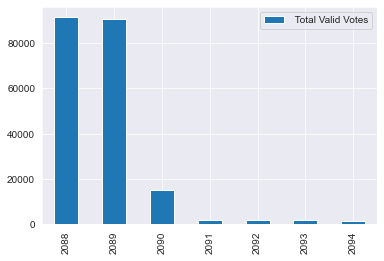

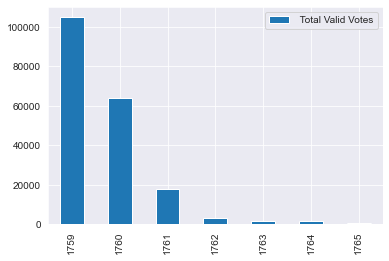

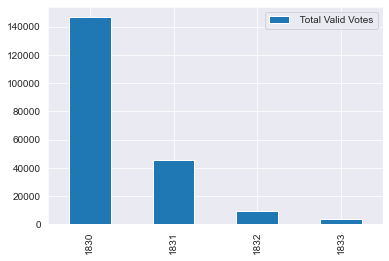

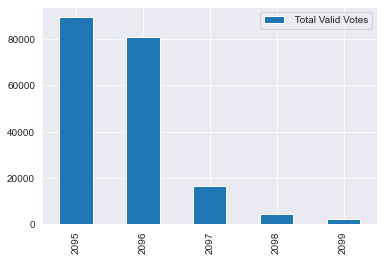

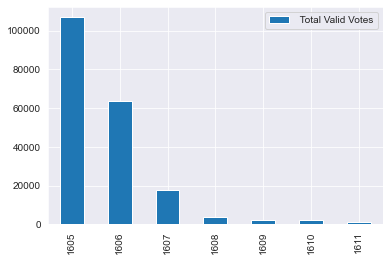

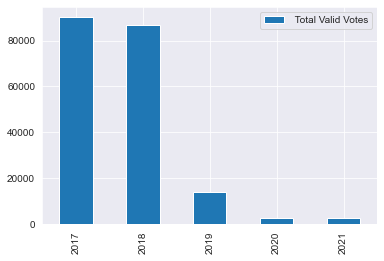

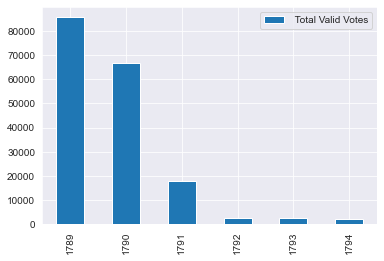

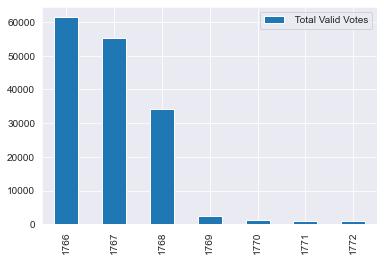

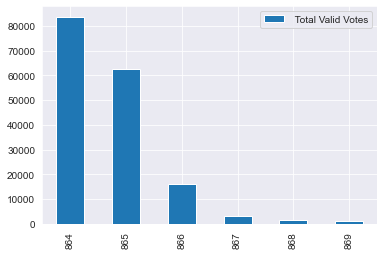

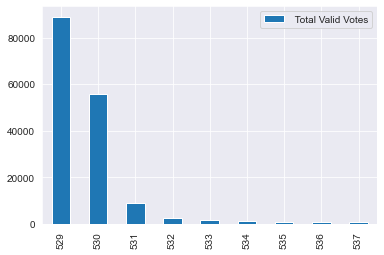

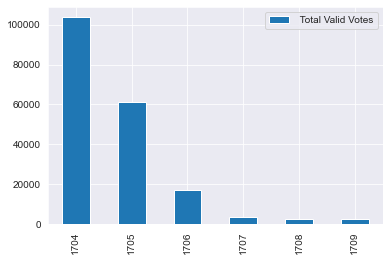

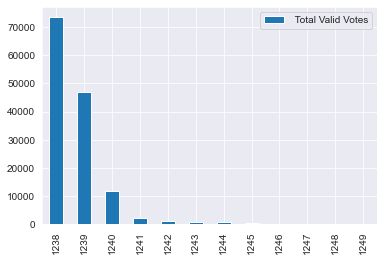

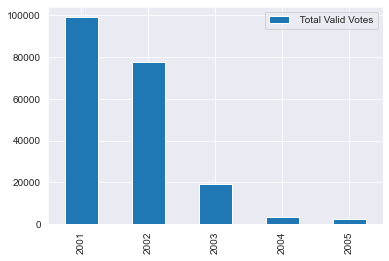

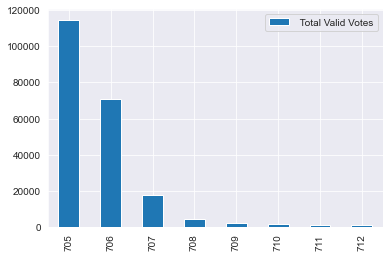

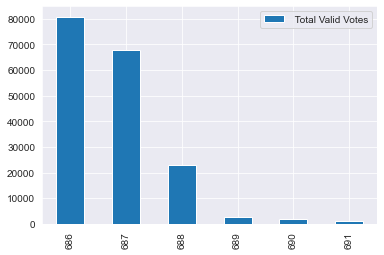

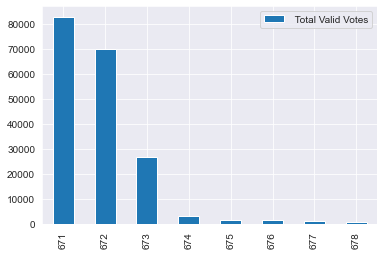

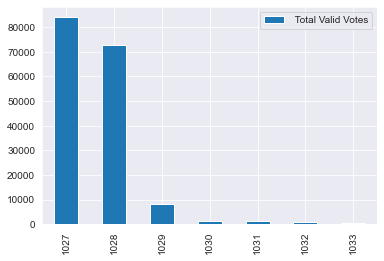

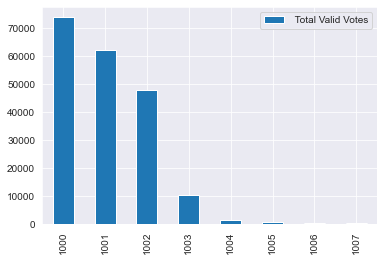

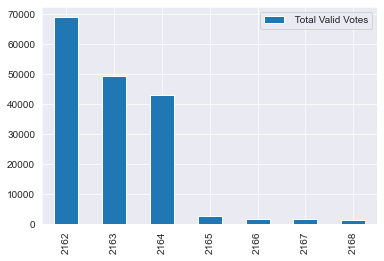

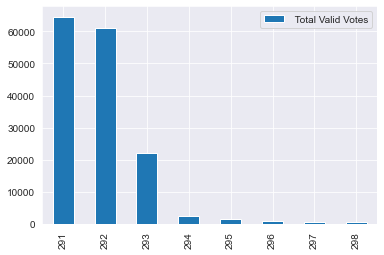

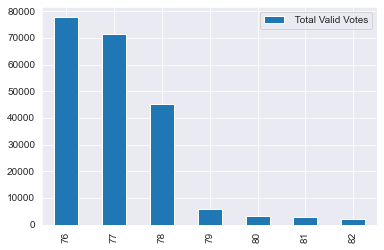

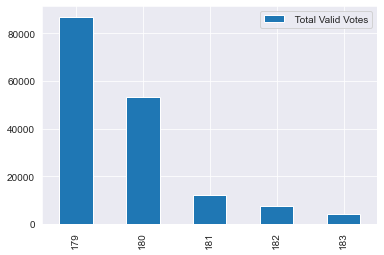

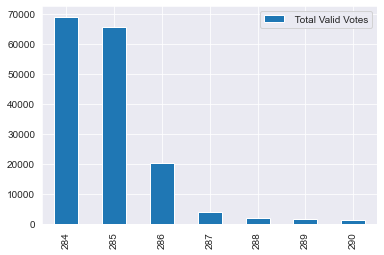

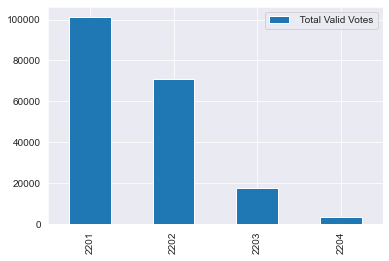

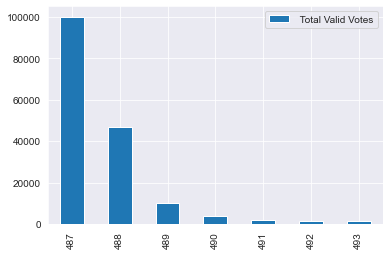

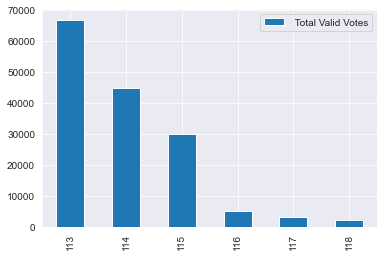

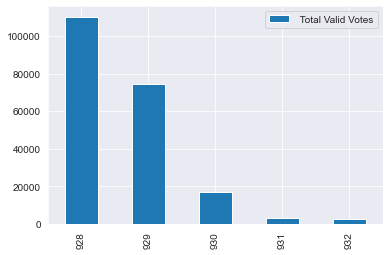

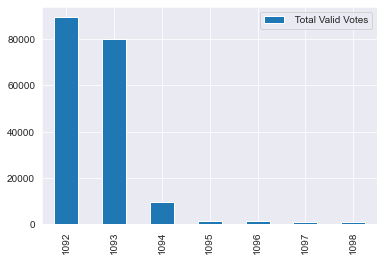

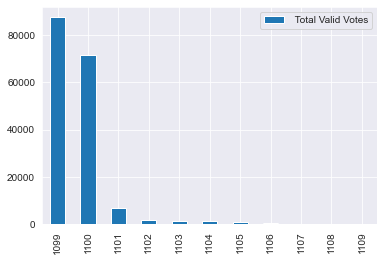

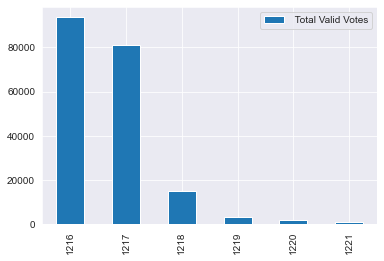

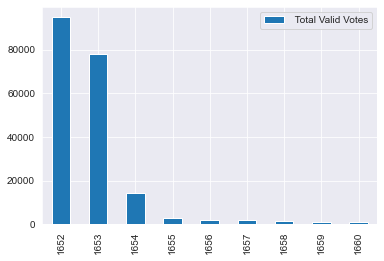

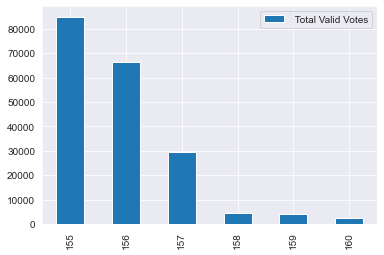

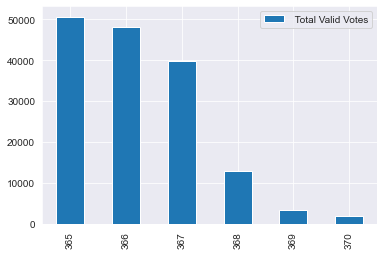

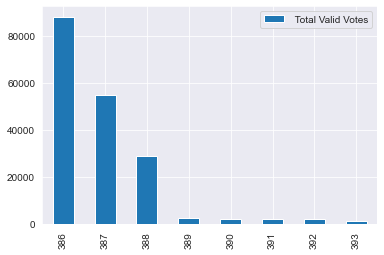

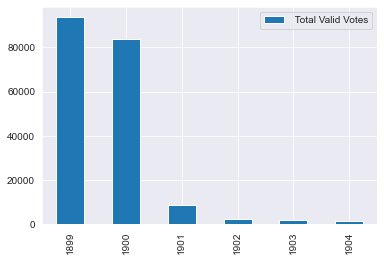

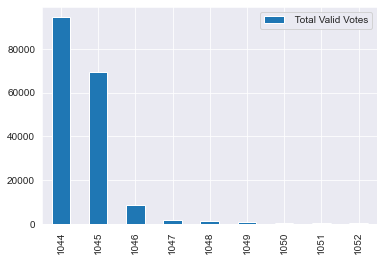

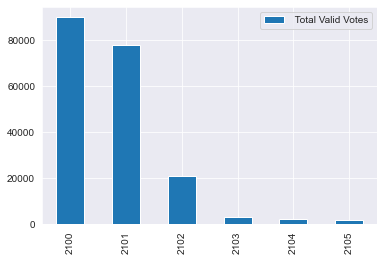

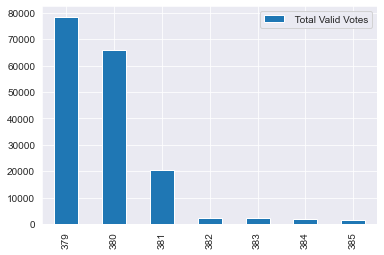

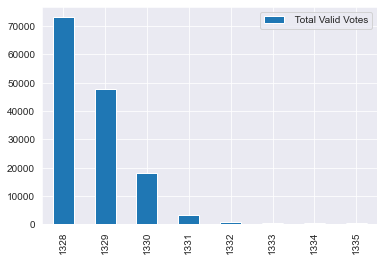

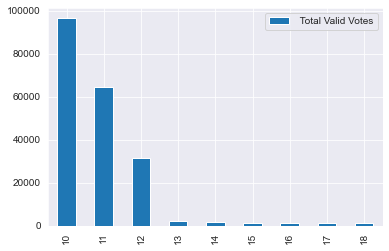

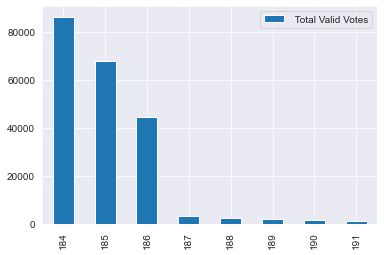

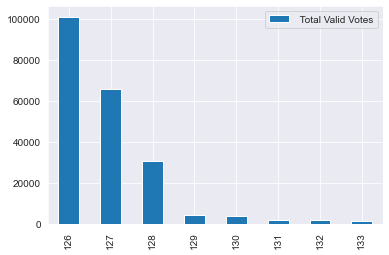

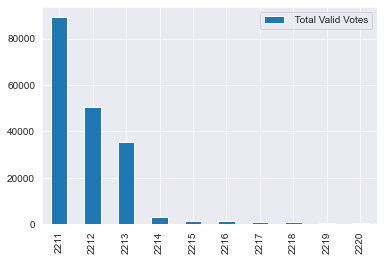

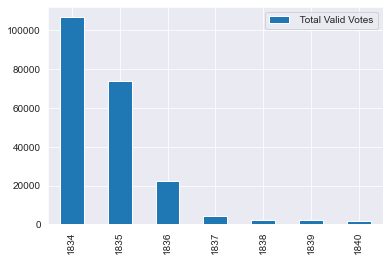

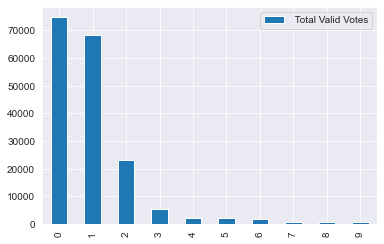

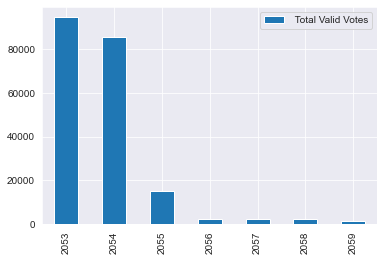

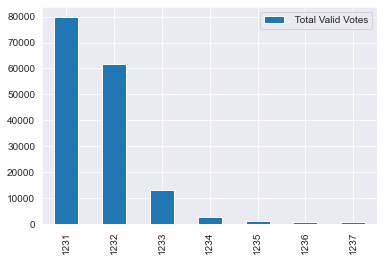

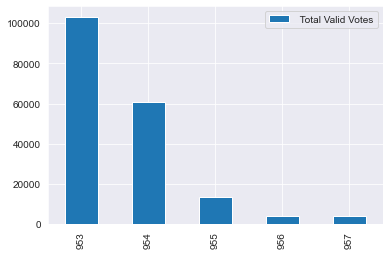

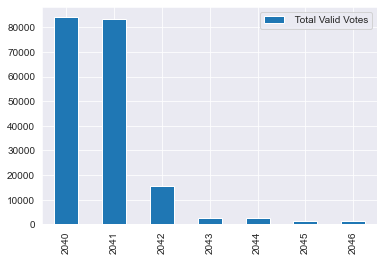

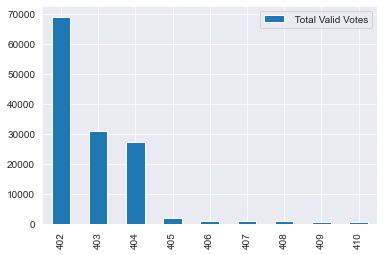

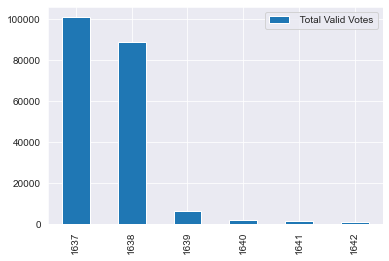

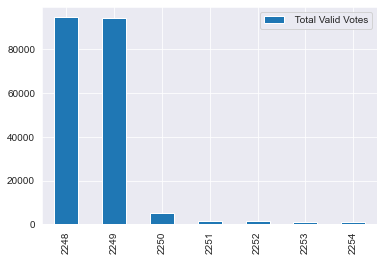

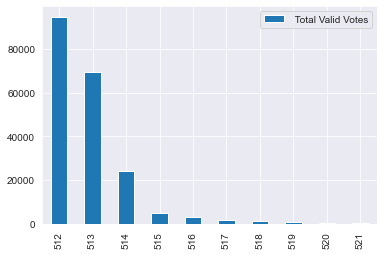

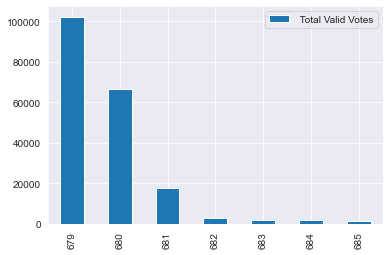

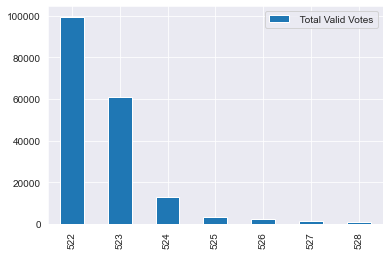

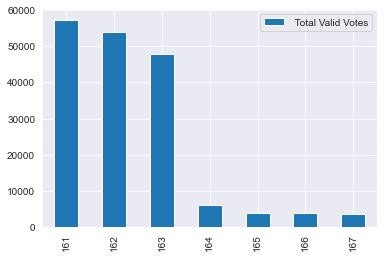

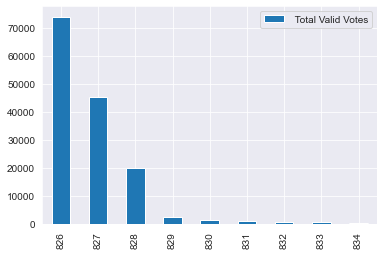

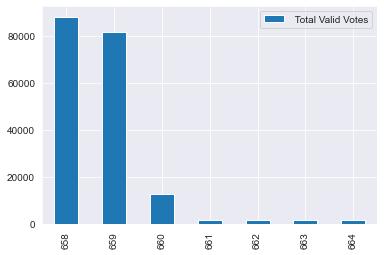

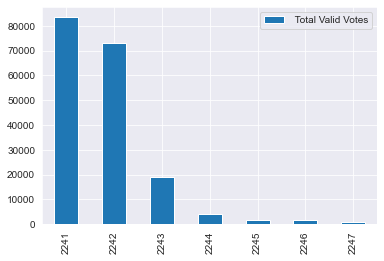

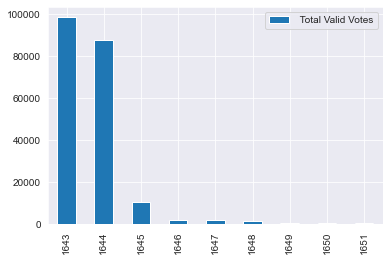

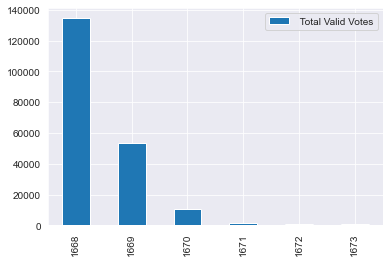

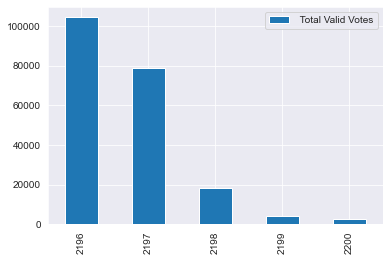

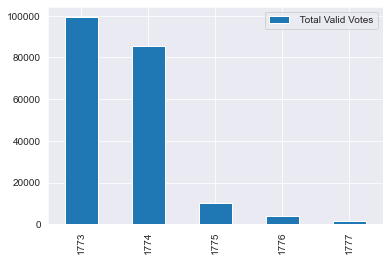

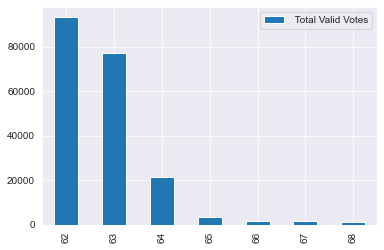

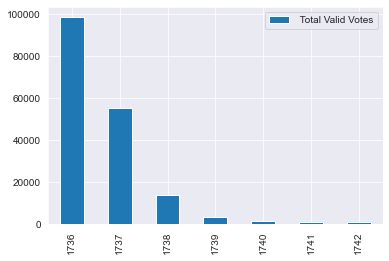

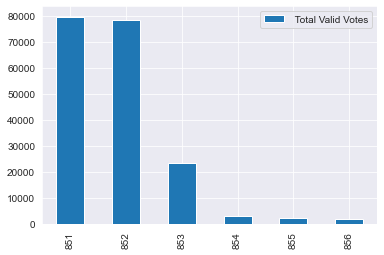

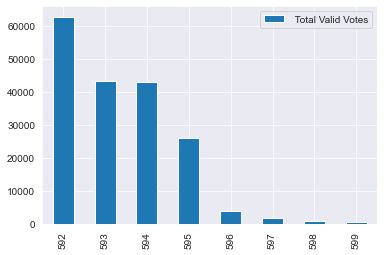

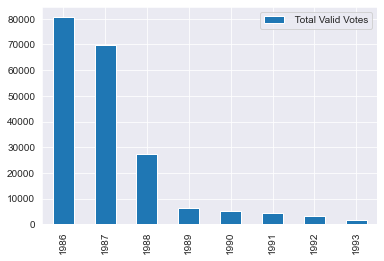

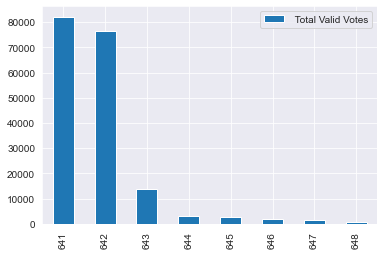

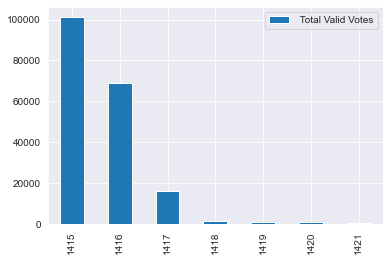

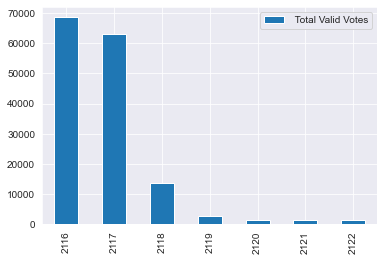

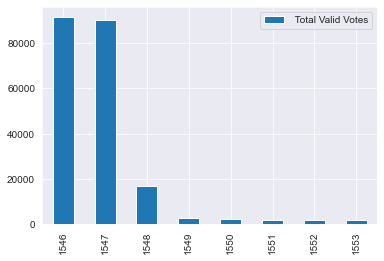

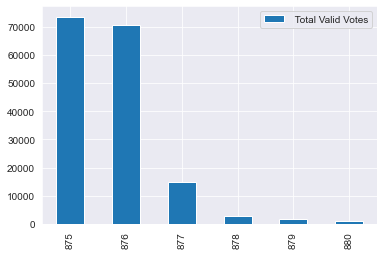

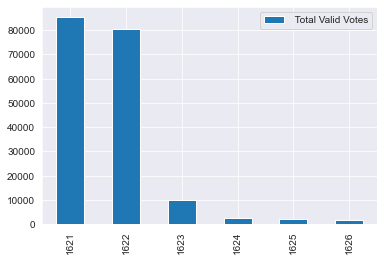

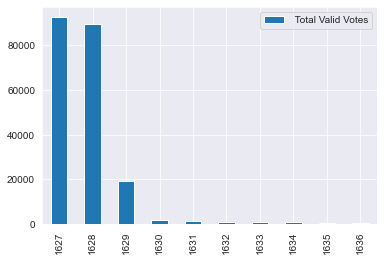

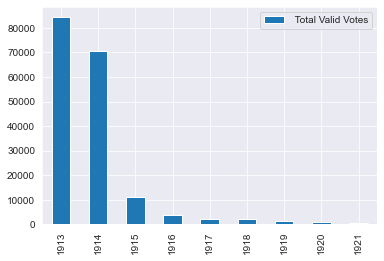

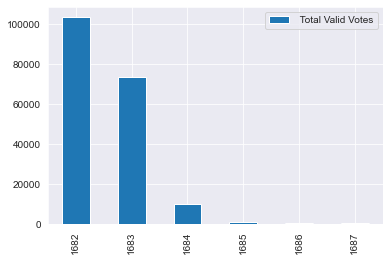

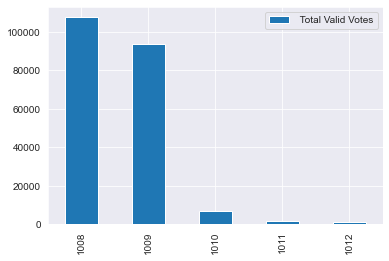

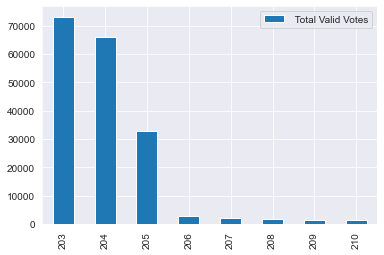

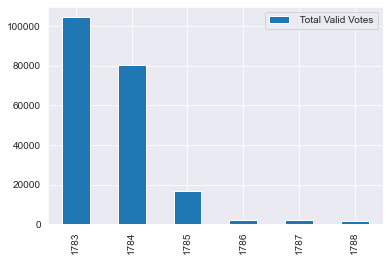

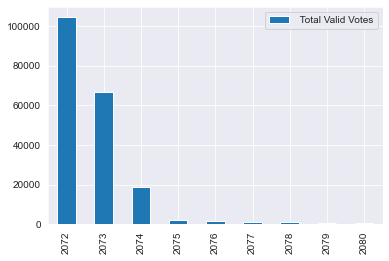

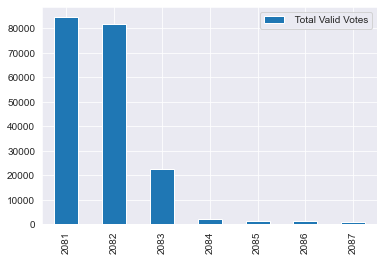

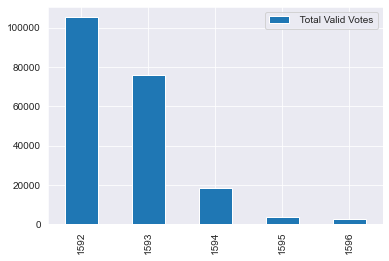

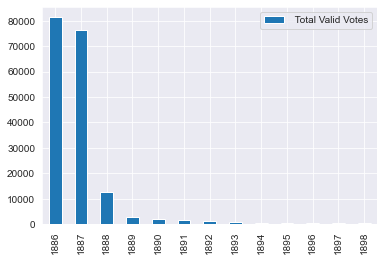

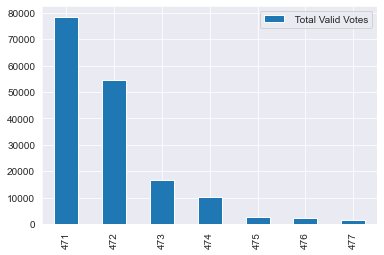

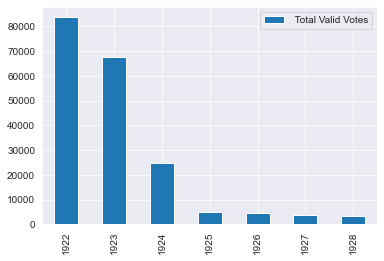

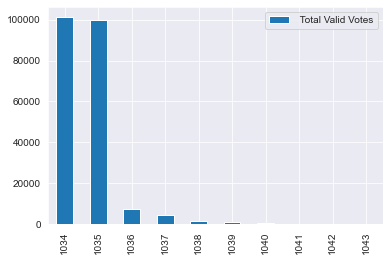

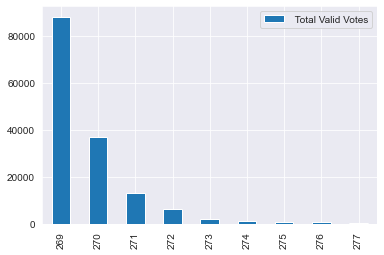

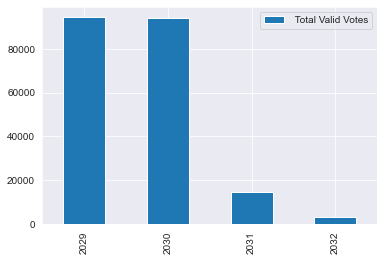

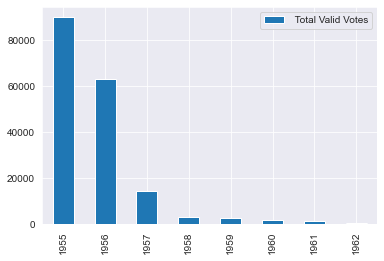

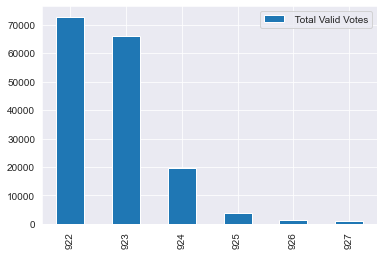

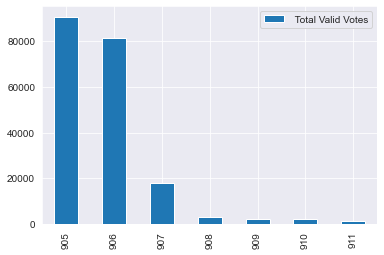

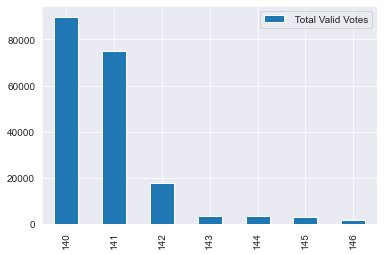

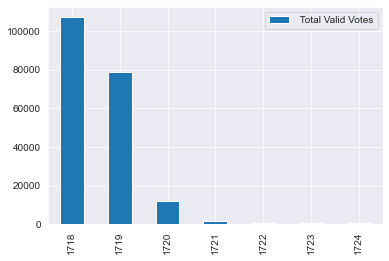

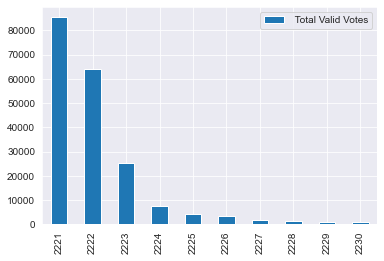

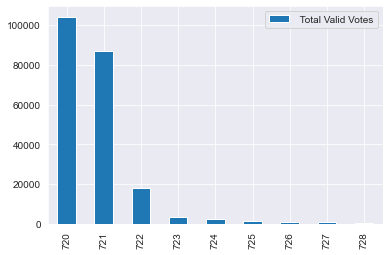

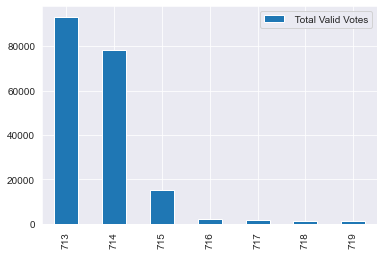

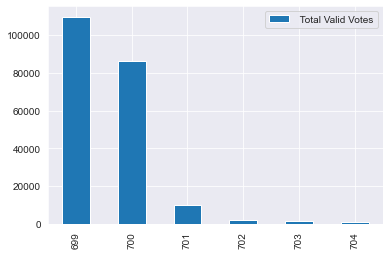

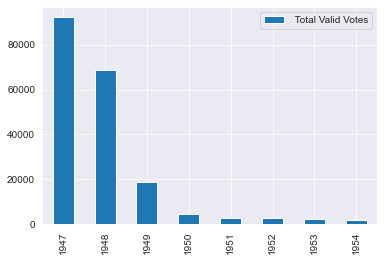

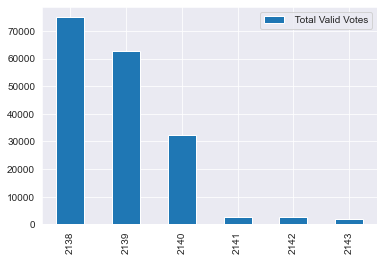

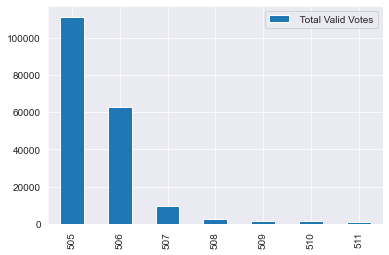

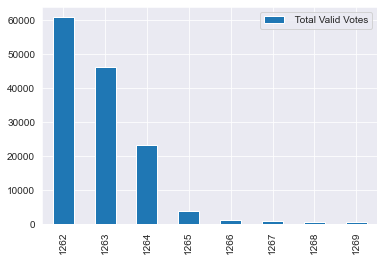

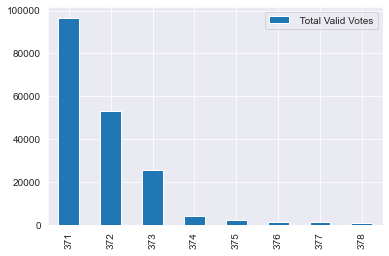

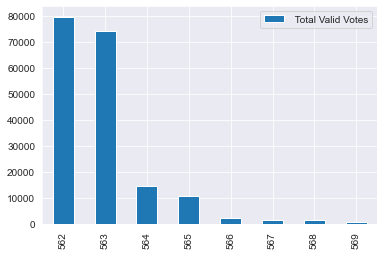

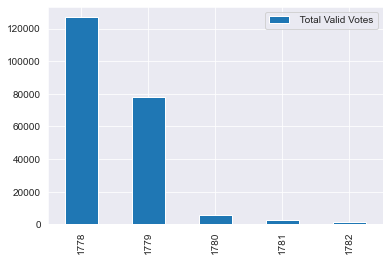

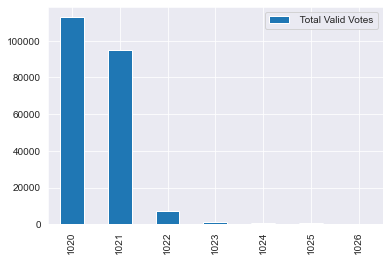

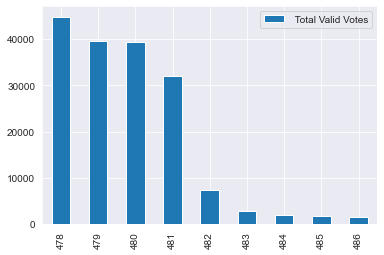

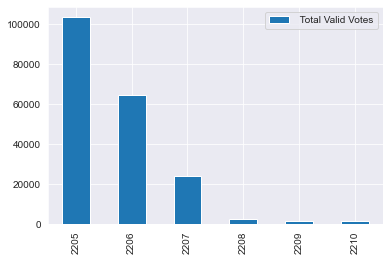

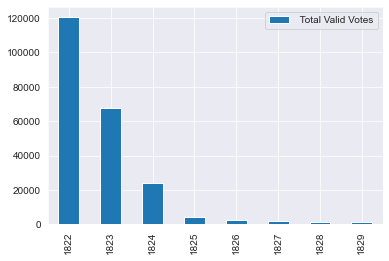

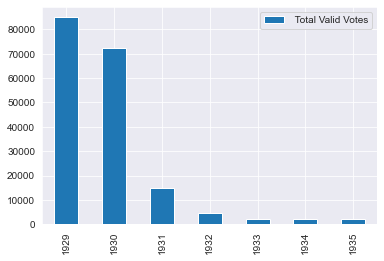

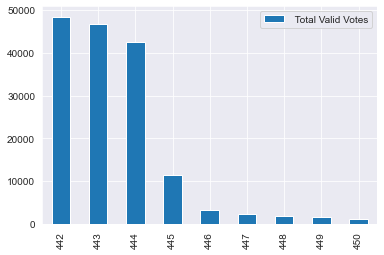

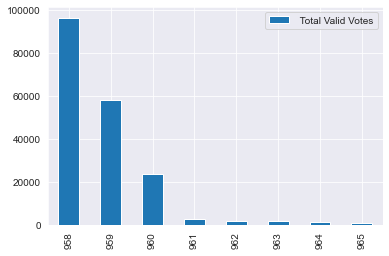

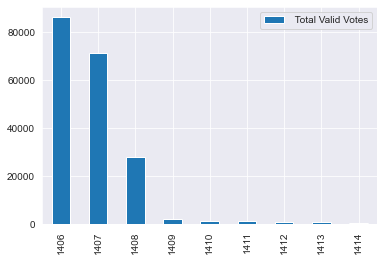

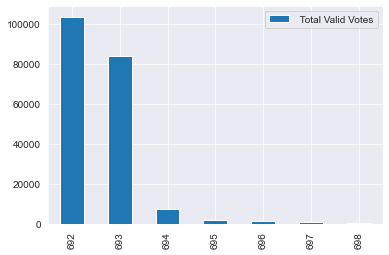

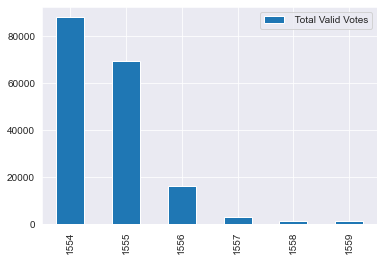

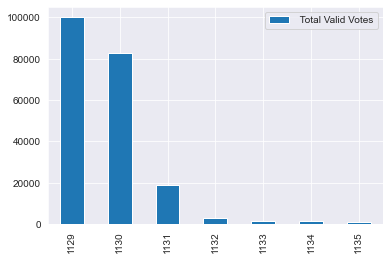

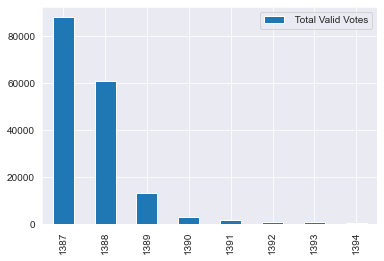

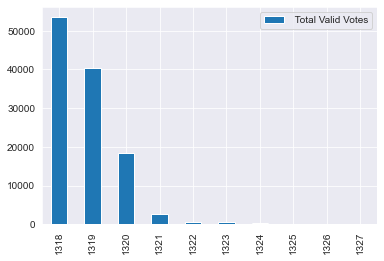

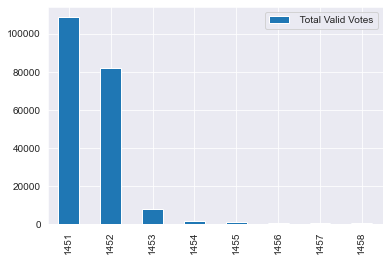

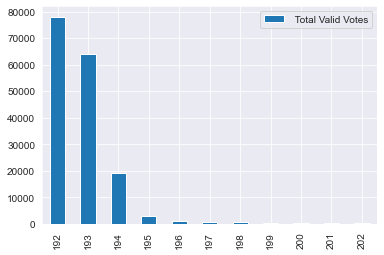

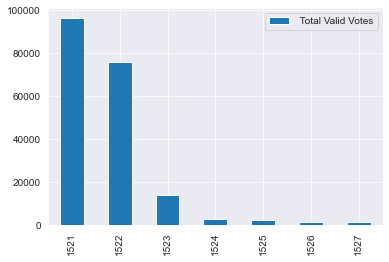

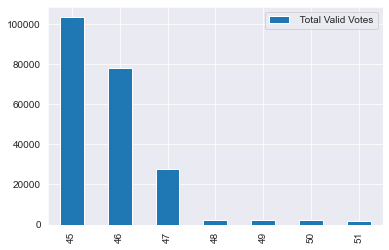

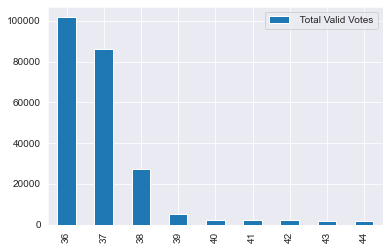

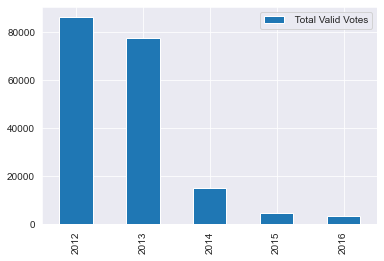

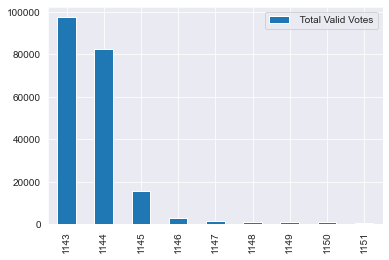

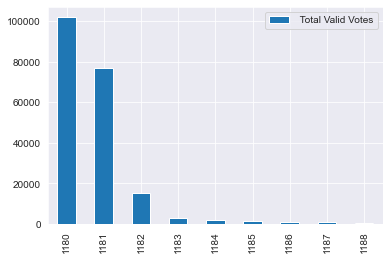

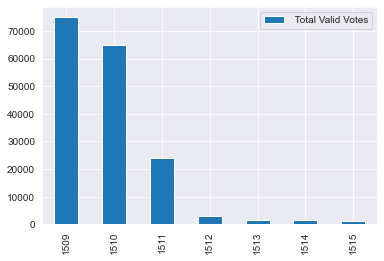

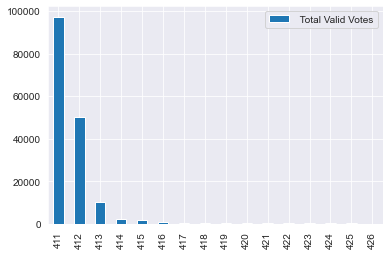

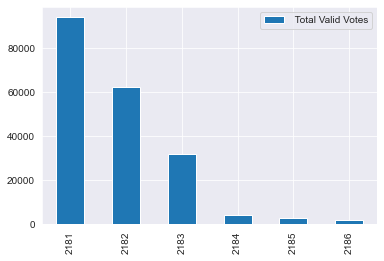

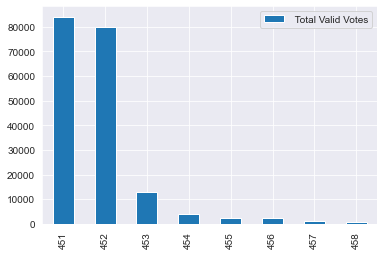

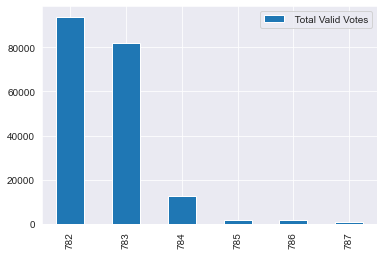

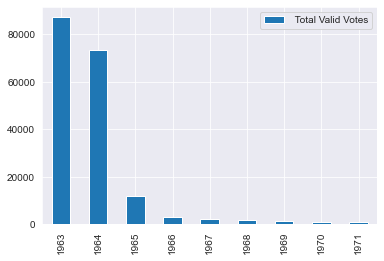

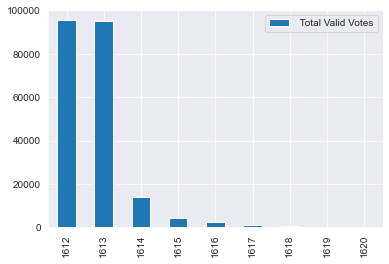

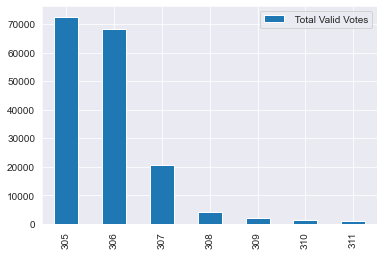

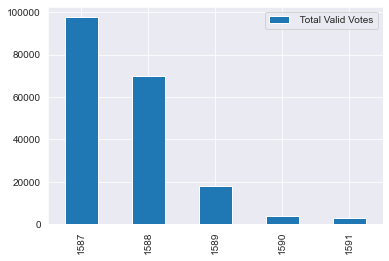

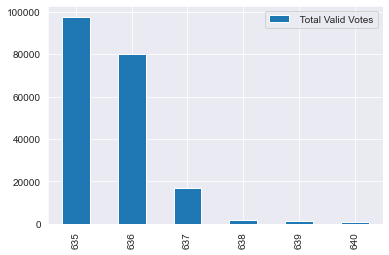

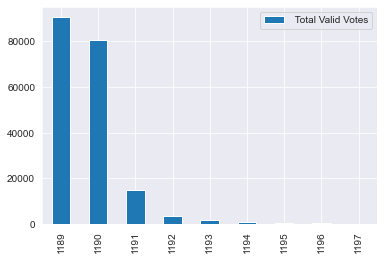

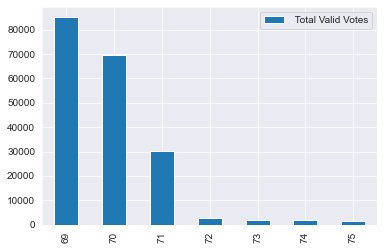

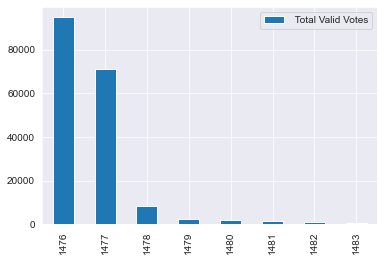

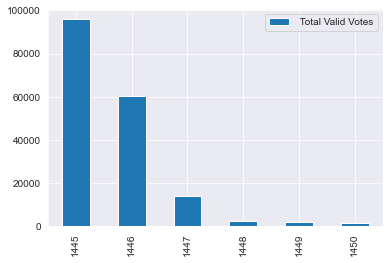

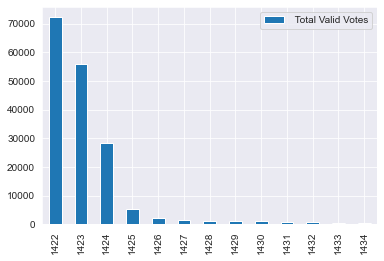

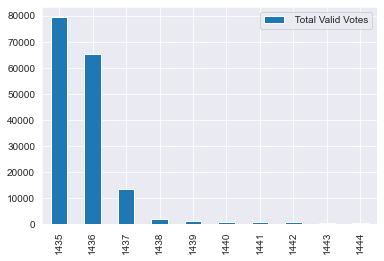

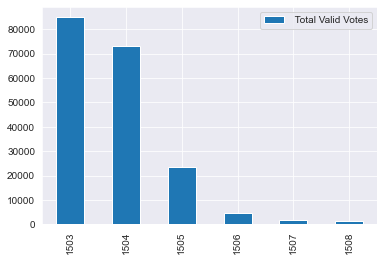

In [210]:
Bengal_detail_result_analysis[[' Total Valid Votes',"Constituency Name"]].groupby("Constituency Name").plot.bar();

-------------

In [211]:
Bengal_detail_result_analysis

Constituency No. Constituency Name             Candidate Name  \
0                    1         Mekliganj  ARGHYA ROY PRADHAN (BILU)   
1                    1         Mekliganj    PARESH CHANDRA ADHIKARY   
2                    1         Mekliganj               DADHIRAM RAY   
3                    1         Mekliganj                JYOTISH ROY   
4                    1         Mekliganj          None of the Above   
...                ...               ...                        ...   
2250               294           Murarai          HAYATUNNINSH BIBI   
2251               294           Murarai          None of the Above   
2252               294           Murarai                 BELAL SEKH   
2253               294           Murarai              MANGAL HEMRAM   
2254               294           Murarai               SAMSHUL MIYA   

     Candidate Sex  Candidate Age Candidate Category  Party Name  \
0                M           44.0                 SC        AITC   
1                M           63.0                 SC        AIFB   
2                M           32.0                 SC         BJP   
3                M           66.0                 SC         BSP   
4              NaN            NaN                NaN        NOTA   
...            ...            ...                ...         ...   
2250             F           26.0                GEN         BJP   
2251           NaN            NaN                NaN        NOTA   
2252             M           28.0                GEN         BSP   
2253             M           65.0                 ST        SUCI   
2254             M           48.0                GEN         RLD   

       VALID VOTES POLLED in General   VALID VOTES POLLED in Postal  \
0                              74608                            215   
1                              67821                            365   
2                              23313                             42   
3                               5650                              0   
4                               2331                              2   
...                              ...                            ...   
2250                            5341                              4   
2251                            1687                              2   
2252                            1376                              0   
2253                             910                              7   
2254                             866                              0   

       Total Valid Votes  Total Electors  Total Votes  
0                  74823          202689       180960  
1                  68186          202689       180960  
2                  23355          202689       180960  
3                   5650          202689       180960  
4                   2333          202689       180960  
...                  ...             ...          ...  
2250                5345          234055       199235  
2251                1689          234055       199235  
2252                1376          234055       199235  
2253                 917          234055       199235  
2254                 866          234055       199235  

[2255 rows x 12 columns]

In [212]:
Bengal_detail_result_analysis.columns

Index(['Constituency No.', 'Constituency Name', 'Candidate Name',
       'Candidate Sex', 'Candidate Age', 'Candidate Category', ' Party Name',
       ' VALID VOTES POLLED in General', ' VALID VOTES POLLED in Postal',
       ' Total Valid Votes', 'Total Electors', 'Total Votes'],
      dtype='object')

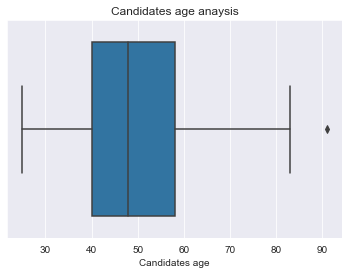

In [213]:
visualization(Bengal_detail_result_analysis['Candidate Age'],"","","Candidates age","","Candidates age anaysis").boxplot_plot()

<ul>
    <li>25% or first quartile is approx 40 years</li>
    <li>Median age is 48 years </li>
    <li>IQR is for 40-59 years </li>
    </ul>

In [222]:
Performance_of_political_parties_2016 = pd.read_excel("Performance of Poltical Parties.xlsx",header = 1)

In [252]:
Performance_of_political_parties_2016.head(5)

Party Type                           Party Name  Contested  Won  Forfitted  \
0          N               Bharatiya Janata Party        291    3        263   
1          N                  Bahujan Samaj Party        161    0        161   
2          N             Communist Party of India         11    1          0   
3          N  Communist Party of India  (Marxist)        148   26          0   
4          N             Indian National Congress         92   44          4   

      Votes  Total Valid Votes  Votes in %  \
0   5555134           54697791   10.156048   
1    300294           54697791    0.549006   
2    791925           54697791    1.447819   
3  10802058           54697791   19.748618   
4   6700938           54697791   12.250838   

   Total Valid Votes in Seat Contested   VOTE % IN SEATS CONTESTED  
0                             54236459                   10.242435  
1                             29810643                    1.007338  
2                              2124882                   37.269128  
3                             28059913                   38.496406  
4                             16660837                   40.219696

In [254]:
def piechart_party(dataframe):
        fig, ax = plt.subplots()
        seat_won_by_parties = ["All India Trinamool Congress","Indian National Congress","Communist Party of India (Marxist)","Bharatiya Janata Party"]
        df_pie = pd.DataFrame(seat_won_by_parties,columns =["seat_won_by_parties"] )
        seat_won = dataframe["Won"].sort_values(ascending= False)
        seat_won_by_parties_top4 = seat_won[:4]
        seat = seat_won_by_parties_top4
        
        df_pie["count"] = list(seat)
        
        labels = [i for i in df_pie["seat_won_by_parties"]]
        
        points = [j for j in df_pie["count"]]
        add_points = df_pie["count"].sum()
        per = []
        for j in  points:
            per.append(j/add_points)
        percentages = [i for i in df_pie["count"]]
        explode=per
        ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', shadow=False, startangle=0,pctdistance=1.2,labeldistance=1.32);
        ax.axis('equal')
        ax.set_title("Parties final seat won 2016")
        ax.legend(frameon=False, bbox_to_anchor=(1.5,1.0));
    

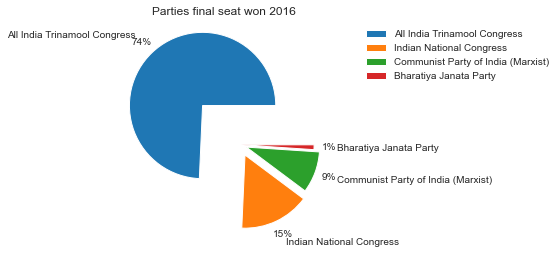

In [255]:
piechart_party(Performance_of_political_parties_2016)

------------

### Lets understand the twitter current anaysis and understand the current situation and anlysis

#### These are 100 randon tweets 

In [416]:
Bengal_2021_twitter_analysis = pd.read_csv("Bengal_sentiment.csv",encoding = "ISO-8859-1")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### As per twitter trending analysis and several other media platform BJP and AITC are the two major parties this year in the election

In [417]:
Bengal_2021_twitter_analysis.head()

Statment Review BJP Review AITC
0  Over 125 BJP workers have been massacred in Be...  positive     negative
1  West Bengal has long suffered due to @mamataof...  positive     negative
2  EVMs and VVPATs found at the residence of a TM...  positive     negative
3  Amit Shah said if BJP doesn't win in Bengal, i...   negative   positive 
4  TMC candidate Manoranjan Byapari, a former ref...   negative   positive

In [418]:
Bengal_2021_twitter_analysis.columns = ["Tweets","Review BJP","Review AITC"]

In [419]:
Bengal_2021_twitter_analysis

Tweets Review BJP Review AITC
0   Over 125 BJP workers have been massacred in Be...  positive     negative
1   West Bengal has long suffered due to @mamataof...  positive     negative
2   EVMs and VVPATs found at the residence of a TM...  positive     negative
3   Amit Shah said if BJP doesn't win in Bengal, i...   negative   positive 
4   TMC candidate Manoranjan Byapari, a former ref...   negative   positive 
..                                                ...        ...         ...
94  Today's hired high-tech election strategists a...  positive     negative
95  National media's obsession to term anything an...   negative   positive 
96  Today election is tailor only when they will t...  positive     negative
97  So many powerful people from Hyderabad, up, bi...   negative   positive 
98  Election battle in #WestBengalAssemblyElection...        NaN         NaN

[99 rows x 3 columns]

In [420]:
Bengal_2021_twitter_analysis["Review BJP"].value_counts()

positive     54
negative     39
Name: Review BJP, dtype: int64

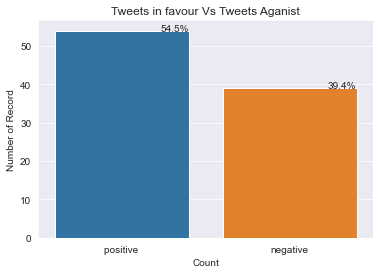

In [422]:
visualization(Bengal_2021_twitter_analysis,"Review BJP","","Count","Number of Record","Tweets in favour Vs Tweets Aganist").countplot_with_percentage_representation()

#### 54.5% tweets are in favour for BJP

In [423]:
from PIL import Image as PILImage
import base64, io, IPython
def image_import(image):
    image = PILImage.open(image)
    output = io.BytesIO()
    image.save(output, format='PNG')
    encoded_string = base64.b64encode(output.getvalue()).decode()
    html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
    return IPython.display.HTML(html)


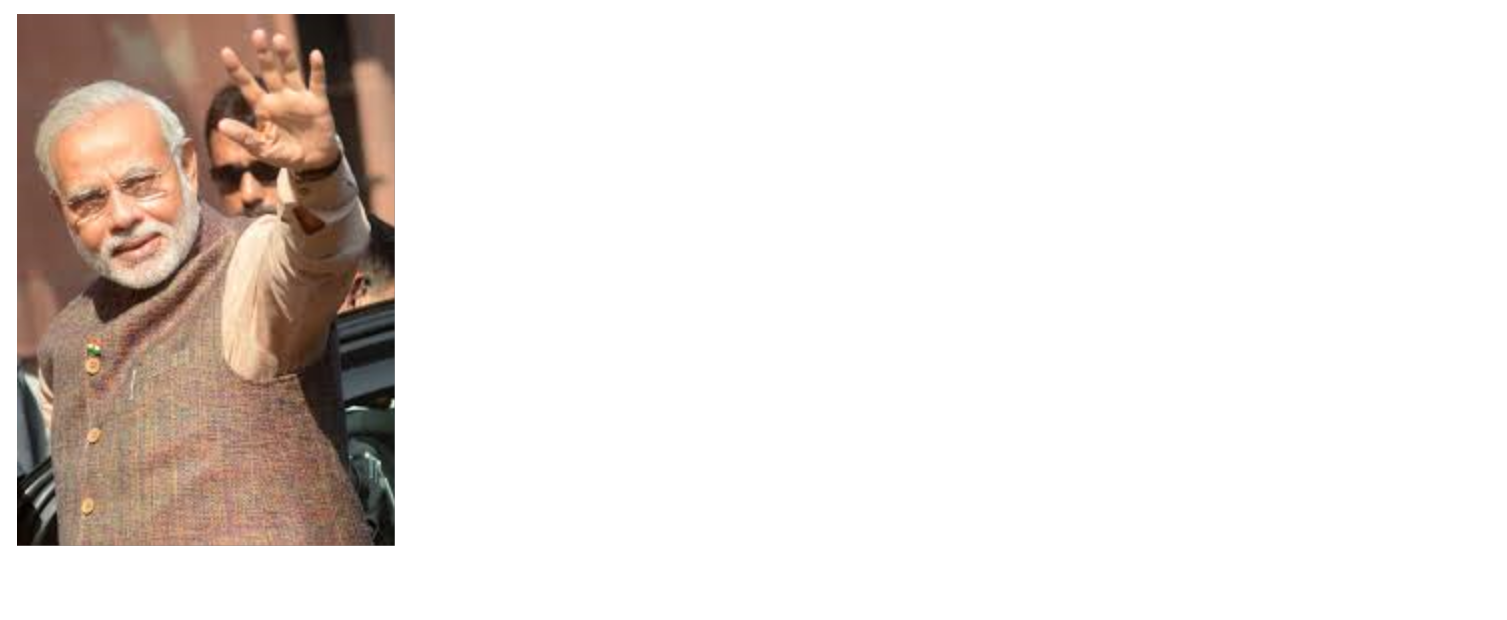

In [424]:
image_import("Modi_ji.png")

#### BJP may be leading in the Social media sites but it is just small random sample and we need to understand more about it 

---------------------

#### Lets understand more about these tweets

In [350]:
Bengal_2021_twitter_analysis['Tweets']=[word.lower() for word in Bengal_2021_twitter_analysis['Tweets']]

In [351]:
Reviews_list = [word.lower() for word in Bengal_2021_twitter_analysis['Tweets']]

In [352]:
Reviews_list[0]

'over 125 bjp workers have been massacred in bengal at the instigation of @mamataofficial in order to further her political motives in west bengal and to make space for her nephew. is didi going to run away from this reality and hide behind closed doors as always?'

In [353]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [354]:
# Fist I tokkenize in sent tokken
Sentence_tokkenize = [nltk.sent_tokenize(sentence) for sentence in Reviews_list]

In [355]:
words_tokkenize =[nltk.word_tokenize(words) for words in  Reviews_list]

In [356]:
from nltk.corpus import stopwords 
nltk.download("stopwords")
stopword_all = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [357]:
Tagged_words = [nltk.pos_tag(words_pos) for words_pos in words_tokkenize ]

In [358]:
  # Noun tagging
def noun_tagging(lst):
    Noun_tag_pos =[]
    for j in range(len(lst)):
        for noun_tg in lst[j]:
            if noun_tg[1]=="NN" or noun_tg[1]=="NNP" or noun_tg[1]=="NNPS" or noun_tg[1]=="NNS":
                Noun_tag_pos.append(noun_tg)
    return Noun_tag_pos

In [359]:
noun_tagging(Tagged_words[:1])

[('workers', 'NNS'),
 ('bengal', 'NN'),
 ('instigation', 'NN'),
 ('mamataofficial', 'NN'),
 ('order', 'NN'),
 ('motives', 'NNS'),
 ('bengal', 'NN'),
 ('space', 'NN'),
 ('nephew', 'NN'),
 ('reality', 'NN'),
 ('hide', 'NN'),
 ('doors', 'NNS')]

In [383]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import RegexpTokenizer
Rg_tokenizer = RegexpTokenizer(r'\w+')
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')

corpus = []
for i in range(0, len(Tagged_words)):
    review = re.sub('[^a-zA-Z]', ' ', Bengal_2021_twitter_analysis['Tweets'][i])
    review = review.lower()
    review = review.split()
    all_stopwords = stopwords.words('english')
    review = [lemmatizer.lemmatize(word,'v') for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mayan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [384]:
# Removing all punctuations
import string
corpus_upd= [''.join(c for c in s if c not in string.punctuation) for s in corpus]
word_tokken_1=[nltk.word_tokenize(e) for e in corpus_upd]

In [385]:
import gensim
from gensim.utils import simple_preprocess
processed_docs = []

for doc in word_tokken_1:
    processed_docs.append((doc))

print(processed_docs[:2])

[['bjp', 'workers', 'massacre', 'bengal', 'instigation', 'mamataofficial', 'order', 'political', 'motives', 'west', 'bengal', 'make', 'space', 'nephew', 'didi', 'go', 'run', 'away', 'reality', 'hide', 'behind', 'close', 'doors', 'always'], ['west', 'bengal', 'long', 'suffer', 'due', 'mamataofficial', 'thirst', 'power', 'power', 'hungry', 'cm', 'sacrifice', 'need', 'people', 'order', 'restrict', 'central', 'government', 'good', 'scheme', 'implement', 'west', 'bengal', 'bengal', 'reject', 'didi']]


In [386]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [387]:
dictionary.filter_extremes(no_below=1, no_above=0.1, keep_n= 100)

In [388]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [389]:
bow_corpus[21]

[(29, 1), (40, 1), (67, 1), (70, 1), (71, 1)]

In [390]:
document_num = 1
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))


Word 0 ("order") appears 1 time.
Word 3 ("central") appears 1 time.
Word 4 ("cm") appears 1 time.
Word 5 ("good") appears 1 time.
Word 6 ("government") appears 1 time.
Word 7 ("long") appears 1 time.
Word 8 ("reject") appears 1 time.
Word 9 ("scheme") appears 1 time.


In [391]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [393]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.084*"banerjee" + 0.083*"vote" + 0.069*"cm" + 0.064*"want" + 0.061*"mamata" + 0.051*"see" + 0.035*"show" + 0.035*"sonar" + 0.035*"poll" + 0.035*"rally"


Topic: 1 
Words: 0.071*"transform" + 0.071*"youth" + 0.071*"bangla" + 0.071*"restore" + 0.071*"smile" + 0.071*"farmers" + 0.071*"aspirations" + 0.071*"sonar" + 0.071*"belief" + 0.071*"prosperous"


Topic: 2 
Words: 0.132*"know" + 0.052*"lakh" + 0.050*"govt" + 0.035*"youth" + 0.035*"time" + 0.035*"show" + 0.034*"think" + 0.034*"long" + 0.034*"years" + 0.034*"also"


Topic: 3 
Words: 0.100*"corruption" + 0.080*"hindi" + 0.080*"politics" + 0.061*"violence" + 0.060*"time" + 0.049*"birthday" + 0.041*"minister" + 0.041*"work" + 0.041*"reject" + 0.041*"speak"


Topic: 4 
Words: 0.104*"assembly" + 0.104*"elections" + 0.085*"today" + 0.070*"birthday" + 0.069*"see" + 0.053*"like" + 0.036*"political" + 0.036*"minister" + 0.035*"high" + 0.034*"claim"


Topic: 5 
Words: 0.149*"years" + 0.081*"lot" + 0.065*"get" + 0.064*"use" + 0.

In [394]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_sc = CoherenceModel(model=lda_model, texts=word_tokken_1, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_sc.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4273124884721501


-----------------

In [428]:
Candidate_analysis_2021 = pd.read_csv("west_bengal.csv")

In [429]:
Candidate_analysis_2021.profile_report()

-----------------

## Data consistent only records of 15 Constituency

In [437]:
Train_data = pd.read_excel("West bengal 2016 result.xlsx")

In [438]:
Train_data

candidate constituency party  \
0         ARUP KUMAR KHAN         Onda  AITC   
1         MANIK MUKHERJEE         Onda  AIFB   
2         AMARNATH SHAKHA         Onda   BJP   
3    ASHOKE CHATTOPADHYAY         Onda   IND   
4        SADHAN CHATTARAJ         Onda   BSP   
..                    ...          ...   ...   
107           TAPAS SINHA     Ramnagar   CPM   
108             TAPAN KAR     Ramnagar   BJP   
109       PRODORSHI GHOSH     Ramnagar   LJP   
110    PRABIR KUMAR MISRA     Ramnagar  BHNP   
111       DHANANJOY DALAI     Ramnagar   IND   

     Winning prediction before election  Final Result  
0                                     1             1  
1                                     0             0  
2                                     0             0  
3                                     0             0  
4                                     0             0  
..                                  ...           ...  
107                                   0             0  
108                                   0             0  
109                                   0             0  
110                                   0             0  
111                                   0             0  

[112 rows x 5 columns]

In [439]:
class label_enconding:
    def __init__(self,dataframe):
        self.dataframe = dataframe
    def features(self):
        important_columns = ["candidate","constituency","party","Winning prediction before election","Final Result"]
        label_Encoder = preprocessing.LabelEncoder()
        self.dataframe['candidate']= label_Encoder.fit_transform(self.dataframe['candidate'])
        self.dataframe['constituency'] = label_Encoder.fit_transform(self.dataframe['constituency'])
        self.dataframe['party']= label_Encoder.fit_transform(self.dataframe['party'])
                
        return self.dataframe      

In [440]:
Data_frame_upd = label_enconding(Train_data).features()

In [441]:
Data_frame_upd

candidate  constituency  party  Winning prediction before election  \
0           14             9      1                                   1   
1           52             9      0                                   0   
2           10             9      4                                   0   
3           15             9     13                                   0   
4           74             9      6                                   0   
..         ...           ...    ...                                 ...   
107        104            12     10                                   0   
108        103            12      4                                   0   
109         67            12     16                                   0   
110         64            12      3                                   0   
111         29            12     13                                   0   

     Final Result  
0               1  
1               0  
2               0  
3               0  
4               0  
..            ...  
107             0  
108             0  
109             0  
110             0  
111             0  

[112 rows x 5 columns]

### using different algorithm

In [442]:
X_fold_nn = Data_frame_upd.iloc[:,:-1].values
y_fold_nn = Data_frame_upd.iloc[:,-1].values
kf = KFold(n_splits = 7,random_state = 42,shuffle = True)
for train_index,test_index in kf.split(X_fold_nn):
    X_train_fold_nn,X_test_fold_nn = X_fold_nn[train_index],X_fold_nn[test_index]
    y_train_fold_nn,y_test_fold_nn = y_fold_nn[train_index],y_fold_nn[test_index]

In [443]:
from sklearn.linear_model import LogisticRegression
Classifier_logisticRegression = LogisticRegression(C=0.1,random_state=42)
Classifier_logisticRegression.fit(X_train_fold_nn,y_train_fold_nn)

LogisticRegression(C=0.1, random_state=42)

In [444]:
y_pred = Classifier_logisticRegression.predict(X_test_fold_nn)

In [446]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
acc_lr = accuracy_score(y_test_fold_nn,y_pred)
print("accuracy {}".format(acc_lr))

accuracy 0.8125


-----------------

In [447]:
from sklearn.ensemble import RandomForestClassifier
Classifier_kfold_rf =RandomForestClassifier(random_state=42)
Classifier_kfold_rf.fit(X_train_fold_nn,y_train_fold_nn)

RandomForestClassifier(random_state=42)

In [448]:
y_pred_kfold_RF = Classifier_kfold_rf.predict(X_test_fold_nn)

In [450]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm_kfold_RF=confusion_matrix(y_pred_kfold_RF,y_test_fold_nn)
accuracy_kfold_RF = accuracy_score(y_pred_kfold_RF,y_test_fold_nn)
precision_kfold_RF =precision_score(y_pred_kfold_RF,y_test_fold_nn)
recall_kfold_RF = recall_score(y_pred_kfold_RF,y_test_fold_nn)
F1score_kfold_RF =f1_score(y_pred_kfold_RF,y_test_fold_nn)
print(cm_kfold_RF)
print("Accuracy{} and Precission:{} and Recall:{} and F1score:{}".format(accuracy_kfold_RF,precision_kfold_RF,recall_kfold_RF,F1score_kfold_RF))

[[13  1]
 [ 0  2]]
Accuracy0.9375 and Precission:0.6666666666666666 and Recall:1.0 and F1score:0.8


---------------

### Just check the result on test data


In [474]:
Test_data = pd.read_excel("Bengal_test.xlsx")

In [476]:
Test_data_dum = pd.read_excel("Bengal_test.xlsx")

In [477]:
Test_data.head()

candidate constituency             party  \
0  Abdul Hai Mallik         Onda               IND   
1   Amarnath Shakha         Onda               BJP   
2     Apurba Mondal         Onda           SUCI(C)   
3   Arup Kumar Khan         Onda              AITC   
4      Bikash Patra         Onda  CPI(ML) Red Star   

   Winning prediction before election  
0                                   0  
1                                   0  
2                                   0  
3                                   1  
4                                   0

In [478]:
Test_data_cp = Test_data

In [479]:
Data_frame_upd_test = label_enconding(Test_data_cp).features()

In [480]:
y_pred = Classifier_kfold_rf.predict(Data_frame_upd_test.iloc[:,:].values)

In [481]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int64)

In [482]:
Test_data_dum["predicted_result"] = list(y_pred)

In [484]:
Test_data_dum

candidate constituency                          party  \
0            Abdul Hai Mallik         Onda                            IND   
1             Amarnath Shakha         Onda                            BJP   
2               Apurba Mondal         Onda                        SUCI(C)   
3             Arup Kumar Khan         Onda                           AITC   
4                Bikash Patra         Onda               CPI(ML) Red Star   
5       Krishna Chandra Bauri         Onda                            IND   
6     Nirmal (Bablu) Banerjee         Onda                     CPI(ML)(L)   
7        Tarapada Chakrabarti         Onda                           AIFB   
8          Abdur Razzak Molla        FALTA                            INC   
9          Atal Kumar Purkait        FALTA                            BSP   
10               Bidhan Parui        FALTA                            BJP   
11                 Deepak Ram        FALTA                            IND   
12             Julfikar Shaik        FALTA                            IND   
13  M. Raquibul Hasan Mallick        FALTA                            IND   
14                 Milan Dhum        FALTA                            IND   
15        Sankar Kumar Naskar        FALTA                           AITC   
16            Santosh Samanta        FALTA   Akhil Bharat Hindu Mahasabha   
17             Somnath Mondal        FALTA                            IND   
18       Abhijit Bhattacharya      PURULIA                            IND   
19              Aditya Mahato      PURULIA                            IND   
20        Birendranath Mahato      PURULIA                            IND   
21       Harendra Nath Mahato      PURULIA                  Amra Bangalee   
22               Manas Sardar      PURULIA                            BSP   
23           Mritunjoy Pandey      PURULIA                            IND   
24    Partha Pratim Banerjeee      PURULIA                            INC   
25                Rani Mahato      PURULIA                        SUCI(C)   
26      Sudip Kumar Mukherjee      PURULIA                            BJP   
27             Sujoy Banerjee      PURULIA                           AITC   
28        Abir Chandra Mandal      CHHATNA                            IND   
29                Anath Bauri      CHHATNA                            IND   
30           Dinabandhu Bauri      CHHATNA            Bahujan Mukti Party   
31        Dinanath Chatterjee      CHHATNA                            IND   
32          Falguni Mukherjee      CHHATNA  Revolutionary Socialist Party   
33         Rabindranath Bouri      CHHATNA                            IND   
34           Sadananda Mandal      CHHATNA                        SUCI(C)   
35  Satyanarayan Mukhopadhyay      CHHATNA                            BJP   
36          Subasish Batabyal      CHHATNA                           AITC   
37           Adhikari Suvendu    NANDIGRAM                            BJP   
38          Dipak Kumar Gayen    NANDIGRAM                            IND   
39            Mamata Banerjee    NANDIGRAM                           AITC   
40            Manoj Kumar Das    NANDIGRAM                        SUCI(C)   
41         Minakshi Mukherjee    NANDIGRAM                         CPI(M)   
42          Sk Saddam Hossain    NANDIGRAM                            IND   
43               Subrata Bose    NANDIGRAM                            IND   
44               Swapan Parua    NANDIGRAM                            IND   
45          Adhikary Nilanjan   NANDAKUMAR                            BJP   
46      Karuna Sankar Bhowmik   NANDAKUMAR                         CPI(M)   
47           Marphat Ali Khan   NANDAKUMAR                            IND   
48        Saumitra Pattanayak   NANDAKUMAR                        SUCI(C)   
49                 Sukumar De   NANDAKUMAR                           AITC   

    Winning prediction before election  predicted_result  
0                                

In [486]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test_fold_nn))]

In [487]:
rf_probabs = Classifier_kfold_rf.predict_proba(X_test_fold_nn)

In [488]:
rf_probabs =rf_probabs[:,1]

In [489]:
ns_auc = roc_auc_score(y_test_fold_nn, ns_probs)
rf_auc = roc_auc_score(y_test_fold_nn, rf_probabs)

In [490]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RF: ROC AUC=%.3f' % (rf_auc))

No Skill: ROC AUC=0.500
RF: ROC AUC=0.821


In [492]:
ns_fpr, ns_tpr, _ = roc_curve(y_test_fold_nn, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test_fold_nn, rf_probabs)

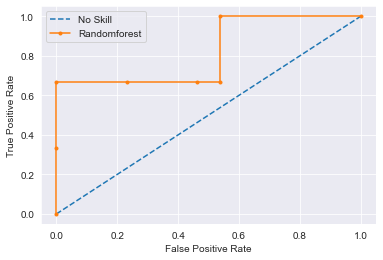

In [493]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill');
plt.plot(rf_fpr, rf_tpr, marker='.', label='Randomforest');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

# show the plot
plt.show();

In [494]:
from shapash.explainer.smart_explainer import SmartExplainer

In [495]:
xpl = SmartExplainer()

In [ ]:
xpl.compile(x=X_test_fold_nn,model =Classifier_kfold_rf )